# Energy Fraud Detection

Imports for notebook:

In [1]:
import numpy as np
import pandas as pd

#from itables import init_notebook_mode
#init_notebook_mode(all_interactive=True)

## Introduction

Looking at dataset of clients and their energy usage over time. The target variable is fraud, and is labelled on a per-client basis.

This is an interesting problem where data is partially corrupted, and has major inconsistencies. Furthermore, there is insufficient information to obtain target variable for all cases.

This notebook conducts the initial data cleaning, where the raw datasets are input, and the 'cleaned' datasets are output.

When rows are removed, they are placed in the df_removed_{train|test} dataset. At least one row for every 'client_id' is needed.

Where relevant, the last row will be kept for the 'client_id' if all would otherwise be removed.

Please refer to the main notebook, "???", for further details and continuation.

## Data Cleaning

### Data Import

In [2]:
# Read the CSV files
df_client_test = pd.read_csv('./client_test.csv', on_bad_lines='skip')
df_client_train = pd.read_csv('./client_train.csv', on_bad_lines='skip')
df_invoice_test = pd.read_csv('./invoice_test.csv', on_bad_lines='skip')
# low_memory is prompted due to unexpected values and large datasize
df_invoice_train = pd.read_csv('./invoice_train.csv', on_bad_lines='skip', low_memory=False)
df_SampleSubmission = pd.read_csv('./SampleSubmission (2).csv', on_bad_lines='skip')

In [3]:
df_SampleSubmission.head()

,client_id,target
0,test_Client_0,0.957281
1,test_Client_1,0.996425
2,test_Client_10,0.612359
3,test_Client_100,0.776933
4,test_Client_1000,0.571046


In [4]:
df_client_test.head()

,disrict,client_id,client_catg,region,creation_date
0,62,test_Client_0,11,307,28/05/2002
1,69,test_Client_1,11,103,06/08/2009
2,62,test_Client_10,11,310,07/04/2004
3,60,test_Client_100,11,101,08/10/1992
4,62,test_Client_1000,11,301,21/07/1977


In [5]:
df_invoice_test.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC


In [6]:
print(f"Number of rows in client train vs invoice train: {len(df_client_train)} vs {len(df_invoice_train)}")
print(f"Number of unique client_id in client train vs invoice train: {df_client_train['client_id'].nunique()} vs {df_invoice_train['client_id'].nunique()}")
print(f"Number of rows in client test vs invoice test: {len(df_client_test)} vs {len(df_invoice_test)}")
print(f"Number of unique client_id in client test vs invoice test: {df_client_test['client_id'].nunique()} vs {df_invoice_test['client_id'].nunique()}", end="")

Number of rows in client train vs invoice train: 135493 vs 4476749
Number of unique client_id in client train vs invoice train: 135493 vs 135493
Number of rows in client test vs invoice test: 58069 vs 1939730
Number of unique client_id in client test vs invoice test: 58069 vs 58069

Going to merge df_client_train and df_invoice_train:

In [7]:
df_test = df_invoice_test.join(df_client_test.set_index('client_id'), on='client_id', validate='m:1').copy()
df_train = df_invoice_train.join(df_client_train.set_index('client_id'), on='client_id', validate='m:1').copy()
df_train

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,...,consommation_level_4,old_index,new_index,months_number,counter_type,disrict,client_catg,region,creation_date,target
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,...,0,14302,14384,4,ELEC,60,11,101,31/12/1994,0.0
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,...,0,12294,13678,4,ELEC,60,11,101,31/12/1994,0.0
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,...,0,14624,14747,4,ELEC,60,11,101,31/12/1994,0.0
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,...,0,14747,14849,4,ELEC,60,11,101,31/12/1994,0.0
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,...,0,15066,15638,12,ELEC,60,11,101,31/12/1994,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,train_Client_99998,2005-08-19,10,1253571,0,202,9,1,400,135,...,0,3197,3732,8,ELEC,60,11,101,22/12/1993,0.0
4476745,train_Client_99998,2005-12-19,10,1253571,0,202,6,1,200,6,...,0,3732,3938,4,ELEC,60,11,101,22/12/1993,0.0
4476746,train_Client_99999,1996-09-25,11,560948,0,203,6,1,259,0,...,0,13884,14143,4,ELEC,60,11,101,18/02/1986,0.0
4476747,train_Client_99999,1996-05-28,11,560948,0,203,6,1,603,0,...,0,13281,13884,4,ELEC,60,11,101,18/02/1986,0.0


In [8]:
del df_invoice_train, df_invoice_test, df_client_train, df_client_test, df_SampleSubmission

### Renaming Columns and setting Data Types

There are some comments from the source regarding the meaning of these columns. These included here verbatim.
* "client_train.csv":
* "disrict: District where the client is"
* "client_id: Unique id for client"
* "client_catg: Category client belongs to"
* "region: Area where the client is"
* "creation_date: Date client joined"
* "target: fraud:1, not fraud: 0"
* "invoice_train.csv":
* "client_id: Unique id for client"
* "invoice_date: Date of the invoice"
* "tarif_type: Type of tax"
* "counter_number: number"
* "counter_statue: akes up to 5 values such as working fine, not working, on hold statue, ect"
* "counter_code: code"
* "reading_remarque: notes that the STEG agent takes during his visit to the cleint (e.g.: if the counter shows something wrong, the"
* "counter_coefficient: An additional coefficient to be added when standard consumption is exceeded"
* "consommation_level_1: Consumption_level_1"
* "consommation_level_2: Consumption_level_2"
* "consommation_level_3: Consumption_level_3"
* "consommation_level_4: Consumption_level_4"
* "old_index: Old index"
* "new_index: New index"
* "months_number: Month number"
* "counter_type: Type of counter"

Going to rename the columns slightly to better match my interpretation of the data gained from inspection.

In [9]:
rename_dict = {'client_id' : 'client_id', 
               'invoice_date' : 'invoice_date', 
               'tarif_type' : 'mtr_tariff', 
               'counter_number' : 'mtr_id',
               'counter_statue' : 'mtr_status', 
               'counter_code' : 'mtr_code', 
               'reading_remarque' : 'mtr_notes',
               'counter_coefficient' : 'mtr_coef', 
               'consommation_level_1' : 'usage_1', 
               'consommation_level_2' : 'usage_2',
               'consommation_level_3' : 'usage_3', 
               'consommation_level_4' : 'usage_4', 
               'old_index' : 'mtr_val_old',
               'new_index' : 'mtr_val_new', 
               'months_number': 'months_num', 
               'counter_type' : 'mtr_type', 
               'disrict' : 'district', 
               'client_catg' : 'client_type',
               'region' : 'region', 
               'creation_date' : 'start_date', 
               'target' : 'fraud'}

df_test.rename(columns=rename_dict, inplace=True) # Note that test won't have target
df_train.rename(columns=rename_dict, inplace=True)

Converting data types where appropriate:

In [10]:
# invoice_date: object -> date [YYYY-MM-DD] -> [YYYY-MM-DD]
df_train['invoice_date'] = pd.to_datetime(df_train['invoice_date'])
# start_date: object -> date [DD/MM/YYYY] -> [YYYY-MM-DD]
df_train['start_date'] = pd.to_datetime(df_train['start_date'], dayfirst=True)

col_names = ['mtr_type', 'district', 'client_type', 'region']
df_train[col_names] = df_train[col_names].astype("category")

# Converting 'mtr_val_' into float for now, as decimal places get in the way otherwise
df_train['mtr_val_old'] = df_train['mtr_val_old'].astype(float).round(0)
df_train['mtr_val_new'] = df_train['mtr_val_new'].astype(float).round(0)

### Data Structure and Hierarchy
Please refer to main notebook for the context. There is an exception in relation to 'mtr_tariff' == 9, where it interacts with coinciding 'mtr_tariff' == 11. This will be handled explictly later, however, a column will be made now for future population.

In [11]:
# This will change depending on context, but is the generic grouping to order rows.
grp_cols = ['client_id', 'mtr_type', 'mtr_tariff', 'mtr_id'] # Then to be sorted by: 'invoice_date'
df_train['temp_1'] = np.nan # Just for calculating and flagging temporarily 
df_train['temp_2'] = np.nan # Just for calculating and flagging temporarily 
df_train['usage_aux'] = 0 # This will house relevant usage from neighbouring invoices
df_train['monthly_usage_aux'] = np.nan # above scaled by invoice span
df_train['usage_aux_flag'] = 0 # Will indicate if being used

#### "Deep" sorting
There is a complication in that very rarely, this grouping, for a given 'invoice_date', may contain two 'mtr_code'. In this case, the ordering should be to try and match 'mtr_code' to the neighbouring rows.

In the case where neither row is matching neighbouring rows' 'mtr_code', they are reversed. the 'Calc_Sort()' function contains the grouping / sorting operation. Again, there is an exception in relation to 'mtr_tariff' == 9, which will be handled later.

In [12]:
def Calc_Sort(df_train, col_name):
    df_train.sort_values(by=grp_cols+['invoice_date'], inplace=True)
    df_train['temp_1'] = np.nan
    df_temp = df_train.groupby(grp_cols, observed=True)
    df_train['temp_1'] = ((df_train['mtr_code'] != df_temp['mtr_code'].shift(1)) & (df_train['mtr_code'] != df_temp['mtr_code'].shift(-1))).astype(int) #prev
    df_train['temp_1'] = df_temp['temp_1'].transform('cumsum') *-1
    df_train.sort_values(grp_cols + (['invoice_date', 'temp_1'] if col_name is None else ['invoice_date', 'temp_1', col_name]), inplace=True) # usage_n will be added here once calculated
    return df_train
# This will need to be updated as aspects such dates change.
df_train = Calc_Sort(df_train.copy(), None)

Based on data mining, some specific relationships have been deduced:
* usage_1 -> usage_4 are sequential "buckets" of usage, that if capped, can "spill" over into the next level.
* It is unclear how the presence of a cap is determined:
  * If mtr_tariff == [10|11] & mtr_code != [3__], more than usage_1 may be used.
  * If usage_3 is being used, so will usage_4.
  * usage_3 cap is equal to usage_1 cap. usage_2 cap is equal half usage_1 cap. usage_4 is uncapped.
  * Order of use is sequential; i.e., cannot use usage_2 before usage_1, etc.
  * If monthly cap == [50 | 300], usage_3 & usage_4 are not used.
* It is unclear how the quantity of the cap is determined:
  * The mtr_tariff and mtr_code seem to have an influence. mtr_status also seems to be influential.
  * If mtr_tariff == [10] & mtr_code == [1__], monthly cap is typically 50 | 100.
  * If mtr_tariff == [10] & mtr_code == [2__], monthly cap is typically 50 | 200.
  * If mtr_tariff == [11], monthly cap is typically 200 | 300.
* The "monthly cap" would be multiplied by the "months_num" to give the cap. This applies most of the time but cannot be relied upon.
* It is being assumed that there is an allowance of energy at different rates, provided on a monthly basis, thus requiring the scaling.
* mtr_val_old and mtr_val_new are meant to track the meter reading:
  * mtr_val_old will be prior to adding the invoice's usage, and mtr_val_new will be after.
  * The usage ("usage_n") is the sum of usage_1 -> usage_4, all multiplied by 'mtr_coef'.
  * This applies most of the time.
     * 'mtr_tariff' == 9 is a notable exception; its 'usage_n' is added to coinciding 'mtr_tariff' == 11 invoice.
* On 'mtr_coef':
  * If mtr_coef > 1, and [usage_3|usage_4] > 0, monthly cap seems to be 200.
  * If mtr_coef > 1, and [usage_3|usage_4] > 0, 'mtr_code' == [483|5__].

Conclusions based on the above:
* A current invoice's mtr_val_old should match previous invoice's mtr_val_new if there was no gap in between. It can be more if there is a gap. It should not be less.
* Similarly, the months_num should equal the difference in invoice dates in months (if there were no gaps). It can be less if there is a gap. It should not be more.
* The mtr_val_old plus the usage should equal mtr_val_new. Where a relevant 'mtr_tariff' == 9 is present, it too should be accounted for.
* The delta of the mtr_val_new of the current invoice and previous invoice should be energy used during the delta of the two invoice dates.

### Data Quality Markers

Going to use some helper functions that identify data inconsistencies as compared to expectations.
#### Intra-Row: Energy Usage
* 'usage_N' is sum of the 'usage_{1|2|3|4}' columns.
* 'usage_N' / 'mtr_coef' = 'usage_n' which represents, presumably, the amount being paid for.
* 'mtr_val_old' + 'usage_n' = 'mtr_val_new'.

'Check_Usage()' checks a series of rules based on expectations. 'Calc_Usage()' calculates these metrics and derives them via different possible permutations.

In [13]:
df_train['usage_flag'] = 0 # Does usage_n match delta of meter values? {0|1|-1} = {Y|N|N w 3 units tolerance}
df_train['usage_n_aux_flag'] = 0 # Does usage_n_aux match delta of meter values? {0|1|-1} = {Y|N|N w 3 units tolerance}

In [14]:
def Calc_Usage(df_train):
    df_train['usage_N'] = df_train.loc[:, ['usage_1', 'usage_2', 'usage_3', 'usage_4']].sum(axis=1)
    df_train['usage_n'] = (df_train['usage_N'] / df_train['mtr_coef']).round(0)
    df_train['monthly_usage'] = df_train['usage_n'].div(df_train['months_num'])
    df_train['monthly_usage_aux'] = df_train['usage_aux'].div(df_train['months_num'])
    df_train['usage_n_aux'] = df_train['usage_n'] + (df_train['usage_aux']*((df_train['usage_aux_flag'] == 1).astype(int)))
    # Calculating derived metrics:
    df_train['usage_n_calc'] = df_train['mtr_val_new'] - df_train['mtr_val_old']
    df_train['usage_aux_calc'] = df_train['usage_n_calc'] - df_train['usage_n']
    df_train['mtr_coef_calc'] = (df_train['usage_N'] / df_train['usage_n_calc']).round(1)
    df_train['mtr_val_new_calc'] = df_train['mtr_val_old'] + df_train['usage_n'].round(0)
    df_train['mtr_val_old_calc'] = df_train['mtr_val_new'] - df_train['usage_n'].round(0)
    return df_train

In [15]:
def Check_Usage(df_train):
    rows = len(df_train)
    # Doing checks:
    mask_1 = df_train['usage_n_calc'] != df_train['usage_n'] # Does usage match
    mask_2 = (df_train['usage_n_calc'] - df_train['usage_n']).abs() > 2 # Allow for tolerance
    df_train['usage_flag'] = mask_1.astype(int)
    df_train.loc[mask_2, 'usage_flag'] = -1 # Fewer will fail with tolerance
    print(f"Rows with unexpected \'usage_n\' values: (with) without tolerance / Total Rows: ({sum(mask_2)}) {sum(mask_1|mask_2)} / {rows}.")
    mask_3 = (df_train['usage_aux_flag'] == 1)
    mask_4 = (df_train['usage_aux_flag'] == -1)
    print(f"Rows allowing \'usage_n_aux\' / not allowing: {sum(mask_3)} / {sum(mask_4)}. Combined: {sum(mask_3|mask_4)}.")
    mask_5 = (df_train['usage_n_calc'] != df_train['usage_n_aux']) # Does usage match, Already reverts to 'usage_n' if blocked
    mask_6 = ((df_train['usage_n_calc'] - df_train['usage_n_aux']).abs() > 2) # Allow for tolerance
    df_train['usage_n_aux_flag'] = mask_5.astype(int)
    df_train.loc[mask_6, 'usage_n_aux_flag'] = -1
    print(f"Rows with unexpected \'usage_n_aux\' values: (with) without tolerance: ({sum(mask_6)}) {sum(mask_5|mask_6)}. Blocked \'usage_n_aux\': {sum(mask_4)}.")
    return df_train

In [16]:
df_train = Calc_Usage(df_train)
df_train = Check_Usage(df_train)

Rows with unexpected 'usage_n' values: (with) without tolerance / Total Rows: (17339) 17533 / 4476749.
Rows allowing 'usage_n_aux' / not allowing: 0 / 0. Combined: 0.
Rows with unexpected 'usage_n_aux' values: (with) without tolerance: (17339) 17533. Blocked 'usage_n_aux': 0.


#### Inter-Row: Meter and Date Consistency
* 'mtr_val_{old|new}' should monotonically increase over time. 
* 'invoice_date' - 'months_num' >= Prev('invoice_date') and should strictly increase over time.

'Calc_Order()' calculates relevant metrics that are then tested in 'Check_Order()'. Since 'months_num' is an integer and vague in its definition, will be adding 1 month leeway to calculations.

In [17]:
df_train['mtr_overlap_bkd'] = 0 # Does mtr_val_old overlap mtr_val_new_prv? {0|1|-1} = {Y|N|N w < 3 units tolerance}
df_train['mtr_overlap_fwd'] = 0 # Does mtr_val_new overlap mtr_val_old_nxt? {0|1|-1} = {Y|N|N w < 3 units tolerance}
df_train['date_overlap_invoice'] = 0 # Does (invoice_date - months_num) overlap invoice_date_prv? {0|1|-1} = {Y|N|N w !> 2 months tolerance}
df_train['date_overlap_months'] = 0 # Does months_num exceed (invoice_date - invoice_date_prv)? {0|1|-1} = {Y|N|N w !> 2 months tolerance}
# If the expected invoice span less than 3 months, the tolerance is shrunk to 1.5 months

In [18]:
def Check_Order(df_train):
    rows = len(df_train)
    # Doing checks:
    mask_1 = (df_train['mtr_val_new_prv'].notna())
    mask_2 = ((df_train['mtr_val_old'] < df_train['mtr_val_new_prv']) & mask_1)
    mask_3 = (((df_train['mtr_val_old'] + 2) < df_train['mtr_val_new_prv']) & mask_1)
    df_train['mtr_overlap_bkd'] = mask_2.astype(int)
    df_train.loc[mask_3, 'mtr_overlap_bkd'] = -1 # Fewer will fail with tolerance
    print(f"Rows with backward overlapping meters: (with) without tolerance / Total Rows: ({sum(mask_3)}) {sum(mask_2|mask_3)} / {rows-sum(~mask_1)}. Excluded NAs: {sum(~mask_1)}.")
    mask_1 = (df_train['mtr_val_old_nxt'].notna())
    mask_2 = ((df_train['mtr_val_new'] > df_train['mtr_val_old_nxt']) & mask_1)
    mask_3 = (((df_train['mtr_val_new'] - 2) > df_train['mtr_val_old_nxt']) & mask_1)
    df_train['mtr_overlap_fwd'] = mask_2.astype(int)
    df_train.loc[mask_3, 'mtr_overlap_fwd'] = -1
    print(f"Rows with forward overlapping meters: (with) without tolerance / Total Rows: ({sum(mask_3)}) {sum(mask_2|mask_3)} / {rows-sum(~mask_1)}. Excluded NAs: {sum(~mask_1)}.")
    mask_1 = (df_train['invoice_date_prv_calc'].notna())
    mask_2 = ((df_train['invoice_date_prv_calc'] < df_train['invoice_date_prv']) & mask_1)
    df_train['temp_1'] = 2.0 # Date tolerance to be used
    df_train.loc[(df_train['months_num'] < 3), 'temp_1'] = 1.5 # Shrink tolerance if expected invoice span is small
    mask_3 = (((df_train['invoice_date_prv_calc'] + pd.to_timedelta(df_train['temp_1']*30.5, unit='days')) < df_train['invoice_date_prv']) & mask_1)
    df_train['date_overlap_invoice'] = mask_2.astype(int)
    df_train.loc[mask_3, 'date_overlap_invoice'] = -1
    print(f"Rows with overlapping invoice spans: (with) without tolerance / Total Rows: ({sum(mask_3)}) {sum(mask_2|mask_3)} / {rows-sum(~mask_1)}. Excluded NAs: {sum(~mask_1)}.")
    mask_2 = ((df_train['months_num_calc'] < df_train['months_num']) & mask_1)
    mask_3 = (((df_train['months_num_calc'] + df_train['temp_1']) < df_train['months_num']) & mask_1)
    df_train['date_overlap_months'] = mask_2.astype(int)
    df_train.loc[mask_3, 'date_overlap_months'] = -1
    print(f"Rows with overlapping invoice spans: (with) without tolerance / Total Rows: ({sum(mask_3)}) {sum(mask_2|mask_3)} / {rows-sum(~mask_1)}. Excluded NAs: {sum(~mask_1)}.")
    return df_train

In [19]:
def Calc_Order(df_train, grp_cols=grp_cols):
    # Group, Find neighbours
    df_grp = df_train.groupby(grp_cols, observed=True)
    df_train['mtr_val_new_prv_2'] = df_grp['mtr_val_new'].shift(2)
    col_names = ['mtr_val_old', 'mtr_val_new', 'invoice_date', 'months_num', 'monthly_usage', 'monthly_usage_aux']
    df_train[[col_name+'_prv' for col_name in col_names]] = (df_grp[col_names].shift(1))
    df_train[[col_name+'_nxt' for col_name in col_names[:2]]] = (df_grp[col_names[:2]].shift(-1))
    df_train['mtr_val_old_nxt_2'] = df_grp['mtr_val_old'].shift(-2)
    # Calculate expected metrics based on relationships
    df_train['invoice_date_prv_calc'] = pd.NaT # If months_num is unreasonable it would crash
    mask = (df_train['months_num'] > 0) & (df_train['months_num'] < 600) & (df_train['months_num'].notna()) # 0 - 50 Years
    df_train.loc[mask, 'invoice_date_prv_calc'] = df_train.loc[mask, 'invoice_date'] - pd.to_timedelta(df_train.loc[mask, 'months_num'].astype(int) * 30.5, unit='days')
    df_train.loc[~mask, 'invoice_date_prv_calc'] = np.nan
    df_train['months_num_calc'] = (((df_train['invoice_date'] - df_train['invoice_date_prv']).dt.days.values / 30.5)).round(1)
    df_train['months_gap_calc'] = df_train['months_num_calc'] - df_train['months_num'] # Difference in dates in months
    return df_train

In [20]:
df_train = Calc_Order(df_train)
df_train = Check_Order(df_train)

Rows with backward overlapping meters: (with) without tolerance / Total Rows: (594321) 597816 / 4242969. Excluded NAs: 233780.
Rows with forward overlapping meters: (with) without tolerance / Total Rows: (594321) 597816 / 4242969. Excluded NAs: 233780.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (715305) 2221006 / 4475343. Excluded NAs: 1406.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (711939) 2075308 / 4475343. Excluded NAs: 1406.


### Data Corruption

#### Column Misalignment
##### Focusing on 'mtr_status'
'mtr_status' had some suspiciously rare values that were manually inspected: [3, 2, 46, A, 628, 769, 269375, 420]. 

From these, Values: ['46', '618', '769', '269375', '420'] seemed symptomatic of data quality issues.

In [21]:
mask = df_train['mtr_status'].isin(['46', '618', '769', '269375', '420']) # Manual check showed 'A' seems acceptable
print(f'number of bad mtr_status: {sum(mask)}.')
col_names = ['mtr_tariff', 'mtr_id', 'mtr_status', 'mtr_code', 'mtr_notes', 'mtr_coef', 'usage_1', 'usage_2', 'usage_3', 'usage_4', 'mtr_val_old', 'mtr_val_new', 'months_num']
pd.concat([df_train[~mask].head(5), df_train[mask].head(5)])[col_names] # Comparison

number of bad mtr_status: 34.


,mtr_tariff,mtr_id,mtr_status,mtr_code,mtr_notes,mtr_coef,usage_1,usage_2,usage_3,usage_4,mtr_val_old,mtr_val_new,months_num
22,11,1335667,0,203,6,1,124,0,0,0,3685.0,3809.0,4
23,11,1335667,0,203,6,1,141,0,0,0,3809.0,3950.0,4
24,11,1335667,0,203,6,1,162,0,0,0,3950.0,4112.0,4
25,11,1335667,0,203,6,1,159,0,0,0,4112.0,4271.0,4
28,11,1335667,0,203,6,1,182,0,0,0,4271.0,4453.0,4
1178214,11,170,769,0,207,6,1,332,0,0,0.0,0.0,332
1178211,11,170,769,0,207,6,1,385,0,0,0.0,332.0,717
1178200,11,170,769,0,207,6,1,479,0,0,0.0,717.0,1196
1178209,11,170,769,0,207,6,1,437,0,0,0.0,1196.0,1633
1178207,11,170,769,0,207,6,1,453,0,0,0.0,1633.0,2086


For these, it is assumed that the columns have been shifted by mistake. One key sign here is usage_1 == 1 and mtr_coef == 6 | 8 | 9.

It is not clear why. In particular, it is not clear what 'mtr_id' and/or 'mtr_status' is meant to represent here and which might be wrong. 'mtr_id' will be kept and 'mtr_status' will be deleted.

'months_num' will be empty for now.

In [22]:
# Flag and modify
df_train['col_shift_flag'] = mask.astype(int)
df_train.loc[mask, df_train.columns[4:14]] = df_train.loc[mask, df_train.columns[5:15]].values
df_train.loc[mask, df_train.columns[14]] = np.nan
df_train = Calc_Usage(df_train)
df_train = Check_Usage(df_train)
pd.concat([df_train[~mask].head(5), df_train[mask].head(5)])[col_names] # Comparison

Rows with unexpected 'usage_n' values: (with) without tolerance / Total Rows: (17314) 17502 / 4476749.
Rows allowing 'usage_n_aux' / not allowing: 0 / 0. Combined: 0.
Rows with unexpected 'usage_n_aux' values: (with) without tolerance: (17314) 17502. Blocked 'usage_n_aux': 0.


,mtr_tariff,mtr_id,mtr_status,mtr_code,mtr_notes,mtr_coef,usage_1,usage_2,usage_3,usage_4,mtr_val_old,mtr_val_new,months_num
22,11,1335667,0,203,6,1,124,0,0,0,3685.0,3809.0,4.0
23,11,1335667,0,203,6,1,141,0,0,0,3809.0,3950.0,4.0
24,11,1335667,0,203,6,1,162,0,0,0,3950.0,4112.0,4.0
25,11,1335667,0,203,6,1,159,0,0,0,4112.0,4271.0,4.0
28,11,1335667,0,203,6,1,182,0,0,0,4271.0,4453.0,4.0
1178214,11,170,0.0,207,6,1,332,0,0,0,0.0,332.0,NaN
1178211,11,170,0.0,207,6,1,385,0,0,0,332.0,717.0,NaN
1178200,11,170,0.0,207,6,1,479,0,0,0,717.0,1196.0,NaN
1178209,11,170,0.0,207,6,1,437,0,0,0,1196.0,1633.0,NaN
1178207,11,170,0.0,207,6,1,453,0,0,0,1633.0,2086.0,NaN


Making sure data type is as expected. Going to treat as an int, and then as a str to accommodate the value "A".

In [23]:
df_train['mtr_status'] = df_train['mtr_status'].apply(lambda x: str(int(x)) if isinstance(x, (int, float)) and x == int(x) else str(x))

##### Focusing on 'mtr_coef'
One identified issue is assumed to be caused by 'mtr_ceof' having had a decimal place that caused an offset in columns. This was deduced by suspicious 'months_num' and 'usage_2' values originally.

For example, "1,5" would cause the "5" to fall into 'usage_1', etc. 'months_num' was then overwritten and lost.

'mtr_coef' would therefore need to be reconstructed for these examples, and columns shifted. 

The lost 'months_num' are empty for now.

Rows have to be filtered carefully to identify only those related to the described data corruption problem:
* If(0 < 'usage_1' < 10), then flag.
  * On the assumption it is single decimal place, it must be a single digit.
  * All other conditions are applied after this.
* If('usage_2' > 0) or If('months_num' > 240), then flag.
  * The minimum monthly cap seen is 50, so 'usage_2' should not be used prior to that.
  * This would not apply if only true 'usage_1' was used, so is insufficient.
  * 'months_num' would not reasonably exceed 20 years.

In [24]:
# Finding those affected
mask = (((df_train['usage_1'] > 0) & (df_train['usage_1'] < 10)) &
        ((df_train['usage_2'] != 0)) | (df_train['months_num'] > 240))
df_temp = df_train[mask]
col_names = ['mtr_coef', 'usage_1', 'usage_2', 'usage_3', 'usage_4', 'mtr_val_old', 'mtr_val_new', 'months_num', 'usage_N', 'usage_n', 'usage_n_calc']
pd.concat([df_train[~mask].head(5), df_train[mask].head(5)])[col_names] # Comparison

,mtr_coef,usage_1,usage_2,usage_3,usage_4,mtr_val_old,mtr_val_new,months_num,usage_N,usage_n,usage_n_calc
22,1,124,0,0,0,3685.0,3809.0,4.0,124,124.0,124.0
23,1,141,0,0,0,3809.0,3950.0,4.0,141,141.0,141.0
24,1,162,0,0,0,3950.0,4112.0,4.0,162,162.0,162.0
25,1,159,0,0,0,4112.0,4271.0,4.0,159,159.0,159.0
28,1,182,0,0,0,4271.0,4453.0,4.0,182,182.0,182.0
20214,1,5,1200,3024,0,0.0,495.0,3311.0,4229,4229.0,495.0
20219,1,5,229,0,0,0.0,342.0,495.0,234,234.0,342.0
20212,1,5,1200,10566,0,0.0,9971.0,17815.0,11771,11771.0,9971.0
20213,1,5,1200,8790,0,0.0,3311.0,9971.0,9995,9995.0,3311.0
20211,1,5,1200,10744,0,0.0,17815.0,25778.0,11949,11949.0,17815.0


In [25]:
# Enact the change, and keep record
df_train.loc[mask, 'col_shift_flag'] = 1
df_train['unk_months_num'] = mask.astype(int)
df_train['mtr_coef'] = df_train['mtr_coef'].astype(float)
df_train.loc[mask, 'mtr_coef'] = df_train.loc[mask, 'mtr_coef'] + (df_train.loc[mask, 'usage_1'].astype(float) / 10).round(1)
df_train.loc[mask, df_train.columns[8:14]] = df_train.loc[mask, df_train.columns[9:15]].values
df_train.loc[mask, df_train.columns[14]] = np.nan
print(f"Number of Rows where Columns seem offset based on ruleset / Total Rows: {sum(mask)} / {len(df_train)}.")
df_train = Calc_Usage(df_train)
df_train = Check_Usage(df_train)
df_train[mask][col_names]

Number of Rows where Columns seem offset based on ruleset / Total Rows: 1392 / 4476749.
Rows with unexpected 'usage_n' values: (with) without tolerance / Total Rows: (15948) 16436 / 4476749.
Rows allowing 'usage_n_aux' / not allowing: 0 / 0. Combined: 0.
Rows with unexpected 'usage_n_aux' values: (with) without tolerance: (15948) 16436. Blocked 'usage_n_aux': 0.


,mtr_coef,usage_1,usage_2,usage_3,usage_4,mtr_val_old,mtr_val_new,months_num,usage_N,usage_n,usage_n_calc
20214,1.5,1200,3024,0,0,495.0,3311.0,NaN,4224,2816.0,2816.0
20219,1.5,229,0,0,0,342.0,495.0,NaN,229,153.0,153.0
20212,1.5,1200,10566,0,0,9971.0,17815.0,NaN,11766,7844.0,7844.0
20213,1.5,1200,8790,0,0,3311.0,9971.0,NaN,9990,6660.0,6660.0
20211,1.5,1200,10744,0,0,17815.0,25778.0,NaN,11944,7963.0,7963.0
...,...,...,...,...,...,...,...,...,...,...,...
4457223,1.5,200,100,200,1810,459733.0,461273.0,NaN,2310,1540.0,1540.0
4457217,1.5,1000,407,0,0,465008.0,465946.0,NaN,1407,938.0,938.0
4457218,1.5,200,100,200,239,463554.0,464047.0,NaN,739,493.0,493.0
4457226,1.5,200,100,200,1321,458519.0,459733.0,NaN,1821,1214.0,1214.0


#### Poor Date Parsing
Another identified issue is assumed caused by the original uploader of the dataset to Kaggle relying on automated date parsing, resulting in months and days being switched in places. This was deduced by considering the 'invoice_date', 'mtr_val_old', 'mtr_val_new', and 'months_num' fields. The significance is that 'months_num' is calculated on true 'invoice_date' and not the recorded 'invoice_date' here.

Using the data hierarchy mentioned before, it would broadly be expected for 'mtr_val_old' and 'mtr_val_new' to increase monotonically.

In [26]:
# Finding those affected
mask = (df_train['invoice_date'].dt.day <= 12) & (df_train['invoice_date'].dt.month <= 12) # Could be switched
mask_2 = ((df_train['mtr_overlap_bkd'] == -1) | (df_train['mtr_overlap_fwd'] == -1)) # Overlapping with tolerance
mask_3 = ((df_train['mtr_overlap_bkd'] != 0) | (df_train['mtr_overlap_fwd'] != 0)) # Overlapping without tolerance

print(f"Rows where meter readings day and month could have been switched / Total Rows: {sum(mask)} / {len(df_train)}.") # ~1/3 of times
print(f"Rows where meter readings seem out of order: (with) without tolerance / Rows where day and month could have been switched: ({sum(mask & mask_2)}) {sum(mask & (mask_2|mask_3))} / {sum(mask)}.") # ~1/3 of times

Rows where meter readings day and month could have been switched / Total Rows: 1976635 / 4476749.
Rows where meter readings seem out of order: (with) without tolerance / Rows where day and month could have been switched: (993260) 998921 / 1976635.


In [27]:
# Flip the day and month for these cases, and keep record. There might be a vectorised way for this to speed this up...
df_train['date_flip_flag'] = mask.astype(int)
df_train.loc[mask, 'invoice_date'] = df_train.loc[mask, 'invoice_date'].apply(lambda x: x.replace(day=x.month, month=x.day) if pd.notna(x) else x)
df_train = Calc_Sort(df_train, 'usage_n')
df_train = Calc_Order(df_train)
df_train = Check_Order(df_train)

Rows with backward overlapping meters: (with) without tolerance / Total Rows: (11791) 11881 / 4242969. Excluded NAs: 233780.
Rows with forward overlapping meters: (with) without tolerance / Total Rows: (11791) 11881 / 4242969. Excluded NAs: 233780.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (3915) 2056692 / 4475322. Excluded NAs: 1427.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (3808) 1747723 / 4475322. Excluded NAs: 1427.


Given how significantly the data quality metric improved, it is unlikely to be due to chance. However, there is still a chance that some did not need switching, for which is nothing is done, unfortunately.

#### Imputing Missing 'months_num'
There were some records that were missing 'months_num' field due to prior data corruption. The importance of 'months_num' is that it gives a direct time-scale for 'usage_n'. This is especially important for the first record of a given group as there would be little-to-no other indications for time-scale otherwise.

Going to be basing on an unseen metric called 'monthly_cap' where possible. However, 'monthly_cap' is not a recorded field and must itself be estimated. Furthermore, only 'mtr_tariff' == 10 | 11 have 'monthly_cap' values. It is nevertheless used here where possible. 

'monthly_cap' refers to the maximum value for 'usage_1' in cases where it is capped. The cap value for 'usage_1' linearly scales based on 'months_num', and so knowing the 'monthly_cap' and 'usage_1' would be enough to deduce 'months_num'.

Through quite a lot of data inspection, various trends were detected:
* Only 'mtr_tariff' == 10|11 can have 'monthly_cap'.
* 'mtr_tariff' == 10:
    * Prior 01/2014: 'monthly_cap' = 50 and usage_(1|2) are used.
    * After 01/2014: 'monthly_cap' = 200 and usage_(1|2) are used.
* 'mtr_tariff' == 11:
    * Prior 07/2005: No 'monthly_cap' and usage_(1) is used.
    * After 07/2005: 'monthly_cap' = 300 and usage_(1|2) are used.
    * After 01/2014: 'monthly_cap' = 200 and usage_(1|2|3|4) are used.

Getting the expected and calculated values for 'monthly_cap' where relevant:

In [28]:
# These are the expected values
df_train['monthly_cap'] = np.nan
mask = (df_train['invoice_date'] >= '01/07/2005') & (df_train['invoice_date'] < '01/01/2014') 
mask_2 = (df_train['mtr_tariff'] == 11)
df_train.loc[(mask & mask_2),'monthly_cap'] = 300
mask = (df_train['invoice_date'] < '01/01/2014')
mask_2 = (df_train['mtr_tariff'] == 10)
df_train.loc[(mask & mask_2),'monthly_cap'] = 50
mask = (df_train['invoice_date'] >= '01/01/2014')
mask_2 = (df_train['mtr_tariff'] == 10) | (df_train['mtr_tariff'] == 11)
df_train.loc[(mask & mask_2),'monthly_cap'] = 200
# These are calculated based on usage
df_train['monthly_cap_calc'] = np.nan
mask = df_train['usage_2'] > 0 # can only calculate if a cap has been reached
df_train.loc[mask, 'monthly_cap_calc'] = df_train.loc[mask, 'usage_1'].div(df_train.loc[mask, 'months_num'])

Imputing 'months_num' based on this relationship where possible:
* First doing those that have 'usage_2' > 0.

In [37]:
mask = (df_train['months_num'].isna()) # Ones that need guessing
mask_2 = (df_train['usage_2'] > 0) # Ones that can be guessed
df_train['months_num_adj'] = (mask&mask_2).astype(int)
df_train.loc[mask&mask_2, 'months_num'] = df_train.loc[mask&mask_2, 'usage_1'].div(df_train.loc[mask&mask_2, 'monthly_cap'])
print(f"Rows with imputed \'months_num\' / Missing \'months_num\': {sum(mask&mask_2)} / {sum(mask)}.")
df_train.loc[mask&mask_2, 'months_num'].value_counts()

Rows with imputed 'months_num' / Missing 'months_num': 422 / 1426.


months_num
1.0     320
4.0      74
2.0      17
3.0       4
8.0       3
6.0       2
12.0      1
5.0       1
Name: count, dtype: int64

Those that do not have 'usage_1' reaching its cap are more challenging to interpret:
* Imputed 'months_num' cannot imply a cap lower than 'usage_1'.
* The 'invoice_date_prv' can be used as an indicator.

In [38]:
df_train['temp_1'] = (df_train['months_num'].isna())
df_train['temp_1'] = df_train.groupby(grp_cols, observed=True)['temp_1'].transform('max')
mask = df_train['temp_1'] == True
df_temp = df_train[mask]

In [ ]:
# If meter order aligns well:
# Look to use Months_num calc.

# months_num_calc Ceil / Floor
# Guess minimum Months_num
# If matches,
# If meter order aligns well

In [ ]:
mask = (df_train['usage_2'] > 0) & (df_train['monthly_cap'] != df_train['monthly_cap_calc']) & (df_train['months_num'].notna()) # Ignore those with missing months_num for now
mask_2 = (((df_train['invoice_date'] < '01/07/2005') | (df_train['invoice_date'] > '31/07/2005')) & 
          ((df_train['invoice_date'] < '01/01/2014') | (df_train['invoice_date'] > '31/03/2014')))
print(f"Rows with unexpected \'monthly_cap\': within dates / outside dates (total): {sum(mask&~mask_2)} / {sum(mask&mask_2)} ({sum(mask)}).")
df_temp = df_train[mask&mask_2]
df_temp

### Data Coherence

#### "Empty" Rows
Some rows are essentially empty. Either they have no recorded usage nor meter values, or similar. These mainly seem out of place, and do not provide much value. These will be removed unless it would not leave at least one row for each 'client_id' and 'mtr_type'.

'Remove_Rows()' function will handle this task.

In [28]:
def Remove_Rows(df_train, mask, reason, df_removed=None):
    df_train['temp_1'] = mask
    # Must have at least one record kept for the group
    mask = mask & (df_train.groupby(['client_id', 'mtr_type'], observed=True)['temp_1'].transform('min') == 0)
    df_temp = df_train[mask].copy()
    df_temp['removed'] = reason
    if df_removed is not None:
        df_removed = pd.concat([df_removed, df_temp.copy()], sort=False)
    else:
        df_removed = df_temp.copy()
    print(f'Rows to be removed / out of rows requested to be removed: {len(df_temp)} / {sum(df_train['temp_1'])}.')
    df_train = df_train[~mask]
    return (df_train.copy(), df_removed.copy(), df_temp)

##### "Empty" 'mtr_coef':
'mtr_coef' of 0 is rare, and any energy usage in that row does not transfer onwards. These primarily are all equally rare 'mtr_tariff' of 8. It was checked that these were unrelated previous 'mtr_coef' issue, i.e., they were not 0.6 etc.

In [29]:
mask = df_train['mtr_coef'] == 0 # Manual check showed these do not contribute to energy usage over time. They reset each row.
df_train['bad_coef'] = mask.astype(int)
df_train, df_removed, df_temp = Remove_Rows(df_train, mask, 'mtr_empty')
df_temp[col_names].head()

Rows to be removed / out of rows requested to be removed: 45 / 45.


,mtr_coef,usage_1,usage_2,usage_3,usage_4,mtr_val_old,mtr_val_new,months_num,usage_N,usage_n,usage_n_calc
179746,0.0,0,0,0,0,0.0,87.0,4.0,0,NaN,87.0
179751,0.0,0,0,0,0,0.0,0.0,4.0,0,NaN,0.0
179755,0.0,0,0,0,0,0.0,633.0,4.0,0,NaN,633.0
997145,0.0,0,0,0,0,0.0,0.0,1.0,0,NaN,0.0
1228208,0.0,0,0,0,0,0.0,0.0,4.0,0,NaN,0.0


##### "Empty" Meter: Focusing on ['usage_{1|2|3|4}', 'mtr_val_{old|new}']
There are some rows where 'n_usage' == 'mtr_val_old' == 'mtr_val_new' == 0. These will be removed as their overall data quality is low, and those that do not seem out of place, simply provide little value. Note that entire 'mtr_id' groups will not be removed.

In [30]:
mask = (df_train[['usage_N', 'mtr_val_old', 'mtr_val_new']] == 0).all(axis=1) # These are considered empty
df_train, df_removed, df_temp = Remove_Rows(df_train, mask, 'mtr_empty', df_removed)
df_temp[col_names].head()
df_train = Check_Usage(df_train)
df_train = Calc_Sort(df_train, 'usage_n')
df_train = Calc_Order(df_train)
df_train = Check_Order(df_train)

Rows to be removed / out of rows requested to be removed: 103849 / 195401.
Rows with unexpected 'usage_n' values: (with) without tolerance / Total Rows: (15945) 16391 / 4372855.
Rows allowing 'usage_n_aux' / not allowing: 0 / 0. Combined: 0.
Rows with unexpected 'usage_n_aux' values: (with) without tolerance: (15945) 16391. Blocked 'usage_n_aux': 0.
Rows with backward overlapping meters: (with) without tolerance / Total Rows: (11245) 11333 / 4143856. Excluded NAs: 228999.
Rows with forward overlapping meters: (with) without tolerance / Total Rows: (11245) 11333 / 4143856. Excluded NAs: 228999.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (3287) 2006779 / 4371429. Excluded NAs: 1426.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (3219) 1704332 / 4371429. Excluded NAs: 1426.


##### No Activity: Focusing on ['usage_{1|2|3|4}', 'mtr_val_{old|new}']
There are also some rows where 'n_usage' == 0 where 'mtr_val_old' == 'mtr_val_new' != 0. These will not be removed, but will be treated with lower priority if in conflict with another row. This is done by the being sorted by 'usage_n' such that, if all else equal, they'd appear before a row with 'usage_n' > 0, and so, will be enveloped by it.

#### Intra-Row: Mis-matched Usage
##### "Stuck" Meter:
There seems to be an issue with the 'mtr_val_{old|new}' not reflecting 'usage_n'. The cause is not clear, assumed some sort of stuck meter.
These will be changed if one of two checks are met:
  1. recalculating 'mtr_val_new' using 'mtr_val_old' and 'usage_n' aligns with the next row. 
  2. recalculating 'mtr_val_old' using 'mtr_val_new' and 'usage_n' aligns with the previous row. 

A rounding error of < 3 units will be allowed for. Done sequentially. This is not ideal as some cases will be missed. A lot of these cases will be removed later downstream.

In [31]:
# Checking with next row:
mask = ((df_train['mtr_val_old'] == df_train['mtr_val_new']) & (df_train['usage_n'] > 0)) # Meter not changing despite usage
mask_2 = ((df_train['mtr_val_old_nxt'] - df_train['mtr_val_new_calc']).abs() > 2) | (df_train['mtr_val_old_nxt'].isna()) # Expect a match, with tolerance
df_train['mtr_stuck'] = 0
df_train.loc[(mask & mask_2), 'mtr_stuck'] = -1 # Those that wouldn't be fixed via adjustment
df_train.loc[(mask & ~mask_2), 'mtr_stuck'] = 1 # Those being adjusted
df_train.loc[(mask & ~mask_2), 'mtr_val_new'] = df_train.loc[(mask & ~mask_2), 'mtr_val_new_calc'] # Replacing
print(f"Looking at Next Row: Fixable / Unfixable (Total): {sum(mask & ~mask_2)} / {sum(mask & mask_2)} ({sum(mask)}).")

# Checking with previous row:
mask_2 = ((df_train['mtr_val_new_prv'] - df_train['mtr_val_old_calc']).abs() > 2) | (df_train['mtr_val_new_prv'].isna()) # Expect a match, with tolerance
df_train.loc[(mask & ~mask_2), 'mtr_stuck'] = 1 # Those being adjusted
df_train.loc[(df_train['mtr_stuck'] != 1) & (mask & mask_2), 'mtr_stuck'] = -1 # Those that wouldn't be fixed via adjustment
df_train.loc[(mask & ~mask_2), 'mtr_val_new'] = df_train.loc[(mask & ~mask_2), 'mtr_val_new_calc'] # Replacing
print(f"Looking at Next Row: Fixable / Unfixable (Total): {sum(mask & ~mask_2)} / {sum(mask & mask_2)} ({sum(mask)}).")

# Re-sort and check for the same rule again
df_train = Calc_Usage(df_train)
df_train = Check_Usage(df_train)
df_train = Calc_Sort(df_train, 'usage_n')
df_train = Calc_Order(df_train)
df_train = Check_Order(df_train)
df_temp = df_train[df_train['mtr_stuck'] == -1]
col_names = ['mtr_coef', 'usage_N', 'usage_n', 'mtr_val_new_prv', 'mtr_val_old', 'mtr_val_new', 'mtr_val_old_nxt', 'months_num', 'mtr_val_new_calc']
df_temp[col_names].head()

Looking at Next Row: Fixable / Unfixable (Total): 2878 / 4403 (7281).
Looking at Next Row: Fixable / Unfixable (Total): 83 / 7198 (7281).
Rows with unexpected 'usage_n' values: (with) without tolerance / Total Rows: (13128) 13482 / 4372855.
Rows allowing 'usage_n_aux' / not allowing: 0 / 0. Combined: 0.
Rows with unexpected 'usage_n_aux' values: (with) without tolerance: (13128) 13482. Blocked 'usage_n_aux': 0.
Rows with backward overlapping meters: (with) without tolerance / Total Rows: (11249) 11386 / 4143856. Excluded NAs: 228999.
Rows with forward overlapping meters: (with) without tolerance / Total Rows: (11249) 11386 / 4143856. Excluded NAs: 228999.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (3287) 2006779 / 4371429. Excluded NAs: 1426.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (3219) 1704332 / 4371429. Excluded NAs: 1426.


,mtr_coef,usage_N,usage_n,mtr_val_new_prv,mtr_val_old,mtr_val_new,mtr_val_old_nxt,months_num,mtr_val_new_calc
1865,1.0,2943,2943.0,7709.0,7709.0,7709.0,7709.0,8.0,10652.0
2865,1.0,5000,5000.0,3143.0,3143.0,3143.0,3143.0,18.0,8143.0
3004,1.0,204,204.0,1469.0,1469.0,1469.0,1469.0,12.0,1673.0
6864,1.0,20,20.0,157.0,157.0,157.0,157.0,4.0,177.0
6918,1.0,44,44.0,15678.0,15702.0,15702.0,15810.0,2.0,15746.0


##### "Phantom" Usage
An almost reverse of the above problem is when there is no apparent usage (usage_N == 0), but 'mtr_val_old' != 'mtr_val_new'.

One identified cause was an interaction with 'mtr_tariff' == 9 where its usage would be added to coinciding 'mtr_tariff' == 11 invoice's meter values. However, this seems quite inconsistant. I am likely not understanding the full picture here, so will try to demonstrate logic used.

Exploring instances of a given 'invoice_date' containing multiple 'mtr_tariff' values, that included 'mtr_tariff' == 9, for a given 'client_id' and 'mtr_id'. From these, looking at how many times the 'usage_n' for given 'mtr_tariff' was non-zero, it seems clear only 'mtr_tariff' == 11 is relevant here.

In [32]:
df_train['temp_1'] = (df_train['mtr_tariff'] == 9)
df_train['temp_1'] = df_train.groupby(['client_id', 'mtr_id'], observed=True)['temp_1'].transform('max') # Client / Meters with tariff 9
df_train['temp_1'] = (df_train['mtr_val_old'] != df_train['mtr_val_new']) & (df_train['usage_N'] == 0) # those with the missing usage
df_train['temp_1'] = df_train.groupby(['client_id', 'mtr_id'], observed=True)['temp_1'].transform('max')
# Make Copy and keep only relevant rows
df_temp = df_train.copy()
df_temp.sort_values(by=['client_id', 'mtr_id', 'invoice_date', 'mtr_tariff'], inplace=True) # Resort 
df_temp = df_temp[df_temp['temp_1'] == True]
col_names = df_temp.loc[df_temp['temp_1'] == True, 'mtr_tariff'].unique().tolist()
col_names.sort()
# Pivot and get sum of usage_n vs usage_n_calc for each mtr_tariff for each invoice_date + mtr_id + client_id
df_temp = df_temp.groupby(['client_id', 'mtr_id', 'invoice_date', 'mtr_tariff'], observed=True)[['usage_n', 'usage_n_calc']].sum().unstack('mtr_tariff', fill_value=-999999999).reset_index()
# Remove rows that have only one mtr_tariff active:
mask = (df_temp[list(zip(['usage_n']*len(col_names), col_names))] != -999999999).sum(axis=1) > 1
df_temp = df_temp[mask]
# Go through each of these mtr_tariff (except 9), and remove those where all instances match as they are not relevant
mask = []
for col_name in col_names:
        df_temp[('match', col_name)] = df_temp[('usage_n', col_name)] == df_temp[('usage_n_calc', col_name)]
        if (col_name != 9) & (sum(df_temp[('match', col_name)]) == len(df_temp)):
            df_temp.drop(columns=[('usage_n', col_name), ('usage_n_calc', col_name), ('match', col_name)], inplace=True)
            mask = mask + [col_name]
col_names = list(filter(lambda x: x not in mask, col_names))
print(f"Number of non-zero rows for \'mtr_tariff\' values / total rows: {col_names}: {[sum(df_temp[('usage_n_calc', col_name)] != 0) for col_name in col_names]} / {len(df_temp)}")
# Know that only columns 9 and 11 matter after running this once
df_temp.drop(columns=[('usage_n', 10), ('usage_n_calc', 10), ('match', 10)], inplace=True)
# Checking whether combining usage from mtr_tariff == 9 would actually help:
df_temp[('usage_n', '11_adj')] = df_temp[('usage_n', 9)] + df_temp[('usage_n', 11)]
df_temp[('match', '11_adj')] = df_temp[('usage_n', '11_adj')] == df_temp[('usage_n_calc', 11)]
df_temp[('delta', 11)] = df_temp[('usage_n_calc', 11)] - df_temp[('usage_n', 11)]
df_temp[('delta', '11_adj')] = df_temp[('usage_n_calc', 11)] - df_temp[('usage_n', '11_adj')]
mask = df_temp[('match', '11_adj')] == False
mask_2 = df_temp[('match', 11)] == False
print(f"Rows \'mtr_tariff\' == 11 usage seemed unexpected, rows when adding \'mtr_tariff\' == 9 usage / rows when not adding: {sum(mask)} / {sum(mask_2)}. (Lower is better!)")
mask = df_temp[('delta', '11_adj')].abs() < df_temp[('delta', 11)].abs()
print(f"Rows where the change reduced the delta in unexpected usage, rows when adding \'mtr_tariff\' == 9 usage / total rows: {sum(mask)} / {len(df_temp)}. (Higher is better!)")

Number of non-zero rows for 'mtr_tariff' values / total rows: [9, 10, 11]: [3969, 4154, 4067] / 4159
Rows 'mtr_tariff' == 11 usage seemed unexpected, rows when adding 'mtr_tariff' == 9 usage / rows when not adding: 2363 / 3918. (Lower is better!)
Rows where the change reduced the delta in unexpected usage, rows when adding 'mtr_tariff' == 9 usage / total rows: 3320 / 4159. (Higher is better!)


Over 75% where fixed and over 95% were at least improved so it is clearly not just a coincidence. The process is repeated below, but with all instances of mtr_tariff == 9|11 included, not just when there is unexpected usage, to ensure nothing is missed.

In [33]:
mask = (df_train['mtr_tariff'] == 9) | (df_train['mtr_tariff'] == 11) # Only care about these two
df_train['temp_1'] = mask
# Make Copy and keep only relevant rows
df_temp = df_train.copy()
df_temp.sort_values(by=['client_id', 'mtr_id', 'invoice_date', 'mtr_tariff'], inplace=True) # Resort 
df_temp = df_temp[df_temp['temp_1'] == True]
col_names = df_temp.loc[df_temp['temp_1'] == True, 'mtr_tariff'].unique().tolist()
col_names.sort()
# Pivot and get sum of usage_n vs usage_n_calc for each mtr_tariff for each invoice_date + mtr_id + client_id
df_temp = df_temp.groupby(['client_id', 'mtr_id', 'invoice_date', 'mtr_tariff'], observed=True)[['usage_n', 'usage_n_calc']].sum().unstack('mtr_tariff', fill_value=-999999999).reset_index()
# Remove rows that have only one mtr_tariff active:
mask = (df_temp[list(zip(['usage_n']*len(col_names), col_names))] != -999999999).sum(axis=1) > 1
df_temp = df_temp[mask]
# Check which instances match
for col_name in col_names:
        df_temp[('match', col_name)] = df_temp[('usage_n', col_name)] == df_temp[('usage_n_calc', col_name)]
print(f"Number of non-zero rows for \'mtr_tariff\' values / total rows: {col_names}: {[sum(df_temp[('usage_n_calc', col_name)] != 0) for col_name in col_names]} / {len(df_temp)}")
df_temp[('usage_n', '11_adj')] = df_temp[('usage_n', 9)] + df_temp[('usage_n', 11)]
df_temp[('match', '11_adj')] = df_temp[('usage_n', '11_adj')] == df_temp[('usage_n_calc', 11)]
df_temp[('delta', 9)] = df_temp[('usage_n_calc', 9)] - df_temp[('usage_n', 9)]
df_temp[('delta', 11)] = df_temp[('usage_n_calc', 11)] - df_temp[('usage_n', 11)]
df_temp[('delta', '11_adj')] = df_temp[('usage_n_calc', 11)] - df_temp[('usage_n', '11_adj')]
df_temp[('usage_n_calc', '11_adj')] = np.nan # will be removed
mask = df_temp[('match', '11_adj')] == False
mask_2 = df_temp[('match', 11)] == False
print(f"Rows \'mtr_tariff\' == 11 usage seemed unexpected, rows when adding \'mtr_tariff\' == 9 usage / rows when not adding: {sum(mask)} / {sum(mask_2)}. (Lower is better!)")
mask = df_temp[('delta', '11_adj')].abs() < df_temp[('delta', 11)].abs()
print(f"Rows where the change reduced the delta in unexpected usage, rows when adding \'mtr_tariff\' == 9 usage / total rows: {sum(mask)} / {len(df_temp)}. (Higher is better!)")

Number of non-zero rows for 'mtr_tariff' values / total rows: [9, 11]: [5334, 5508] / 5644
Rows 'mtr_tariff' == 11 usage seemed unexpected, rows when adding 'mtr_tariff' == 9 usage / rows when not adding: 2394 / 5298. (Lower is better!)
Rows where the change reduced the delta in unexpected usage, rows when adding 'mtr_tariff' == 9 usage / total rows: 4678 / 5644. (Higher is better!)


Therefore, this change was adopted and these values were placed into the previously created 'usage_aux' column.

In [34]:
df_temp['usage_n_9'] = df_temp[('usage_n', 9)] # Can never get my head around this multi level stuff :\
df_temp['mtr_tariff'] = 11
col_names = list(zip(['usage_n', 'usage_n_calc', 'match', 'delta']*3, [9, 11, '11_adj']*4))
df_temp.drop(columns=col_names, inplace=True)
df_temp.columns = df_temp.columns.get_level_values(0)
col_names = ['client_id', 'mtr_id', 'invoice_date', 'mtr_tariff']
df_train = df_train.merge(df_temp[col_names+['usage_n_9']], on=col_names, how='left')
mask = df_train['usage_n_9'].notna()
df_train.loc[mask, 'usage_aux_flag'] = 1
df_train.loc[mask, 'usage_aux'] = df_train.loc[mask, 'usage_n_9']
df_train.drop(columns=['usage_n_9'], inplace=True)
# Revert to original sort and check usage once more
df_train = Calc_Sort(df_train, 'usage_n')
df_train = Calc_Usage(df_train)

Going to reject those cases where 'usage_aux' was not helpful:
* If(abs(delta(using 'usage_aux')) < abs(delta(!using 'usage_aux'))) and If(delta(using 'usage_aux') > -10), then accept
   * As long as it does not 'overshoot' by too much, can be accepting of almost any improvement.
* If(abs(delta(using 'usage_aux')) x 4 < abs(delta(!using 'usage_aux'))), then accept
   * Otherwise, would want a substantial improvement to justify inclusion.

In [35]:
mask = df_train['usage_aux_flag'] == 1 # Those that had overlapping mtr_tariff == 9
df_train['temp_1'] = np.nan
df_train.loc[mask, 'temp_1'] = df_train.loc[mask, 'usage_n_calc'] - df_train.loc[mask, 'usage_n']
mask_2 = (df_train['temp_1'] - df_train['usage_aux']) # Residual delta after making usage of 'usage_aux'
mask_2 = (((mask_2.abs() * 4) < (df_train['temp_1']).abs()) |
          ((mask_2.abs() < df_train['temp_1'].abs()) & (mask_2 > -10)))
df_train.loc[(mask & ~mask_2), 'usage_aux_flag'] = -1 # These are flagged as rejected, although they are retained for now
df_train = Calc_Usage(df_train)
df_train = Check_Usage(df_train)
df_temp = df_train[(mask & ~mask_2)]
df_temp

Rows with unexpected 'usage_n' values: (with) without tolerance / Total Rows: (13128) 13482 / 4372855.
Rows allowing 'usage_n_aux' / not allowing: 4146 / 1499. Combined: 5645.
Rows with unexpected 'usage_n_aux' values: (with) without tolerance: (10148) 10504. Blocked 'usage_n_aux': 1499.


,client_id,invoice_date,mtr_tariff,mtr_id,mtr_status,mtr_code,mtr_notes,mtr_coef,usage_1,usage_2,...,mtr_val_new_nxt,mtr_val_old_nxt_2,invoice_date_prv_calc,months_num_calc,months_gap_calc,col_shift_flag,unk_months_num,date_flip_flag,bad_coef,mtr_stuck
8437,train_Client_100244,2014-05-15,11,630735,0,413,8,1.0,400,200,...,2138.0,2138.0,2014-03-15,NaN,NaN,0,0,0,0,0
17318,train_Client_100479,2017-02-14,11,21557018982,0,207,9,1.0,0,0,...,469.0,469.0,2016-10-15,NaN,NaN,0,0,0,0,0
17319,train_Client_100479,2017-06-09,11,21557018982,0,207,9,1.0,0,0,...,2069.0,2247.0,2017-02-07,3.8,-0.2,0,0,1,0,0
17321,train_Client_100479,2018-02-13,11,21557018982,0,207,9,1.0,0,0,...,2489.0,2489.0,2017-12-14,3.9,1.9,0,0,0,0,0
17322,train_Client_100479,2018-06-06,11,21557018982,0,207,9,1.0,0,0,...,3177.0,3177.0,2018-02-04,3.7,-0.3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4366035,train_Client_99816,2015-10-20,11,100099,0,413,9,1.0,400,200,...,2883.0,2883.0,2015-08-20,NaN,NaN,0,0,0,0,0
4366040,train_Client_99816,2017-06-13,11,100099,0,413,9,1.0,0,0,...,8011.0,8011.0,2017-02-11,3.8,-0.2,0,0,0,0,0
4366043,train_Client_99816,2018-06-11,11,100099,0,413,9,1.0,0,0,...,10833.0,10833.0,2018-02-09,3.8,-0.2,0,0,1,0,0
4366046,train_Client_99816,2019-06-21,11,100099,0,413,9,1.0,0,0,...,NaN,NaN,2019-02-19,4.0,0.0,0,0,0,0,0


Recalculating the "Stuck Meter" using the 'usage_n_aux':

In [36]:
# Checking with next row:
mask = ((df_train['mtr_val_old'] == df_train['mtr_val_new']) & (df_train['usage_n'] > 0)) # Meter not changing despite usage
mask_2 = ((df_train['mtr_val_old_nxt'] - (df_train['mtr_val_old'] + df_train['usage_n_aux'])).abs() > 2) | (df_train['mtr_val_old_nxt'].isna()) # Expect a match, with tolerance
df_train.loc[(mask & mask_2), 'mtr_stuck'] = -1 # Those that wouldn't be fixed via adjustment
df_train.loc[(mask & ~mask_2), 'mtr_stuck'] = 1 # Those being adjusted
df_train.loc[(mask & ~mask_2), 'mtr_val_new'] = df_train.loc[(mask & ~mask_2), 'mtr_val_new_calc'] # Replacing
print(f"Looking at Next Row: Fixable / Unfixable (Total): {sum(mask & ~mask_2)} / {sum(mask & mask_2)} ({sum(mask)}).")

# Checking with previous row:
mask_2 = ((df_train['mtr_val_new_prv'] - (df_train['mtr_val_new'] - df_train['usage_n_aux'])).abs() > 2) | (df_train['mtr_val_new_prv'].isna()) # Expect a match, with tolerance
df_train.loc[(mask & ~mask_2), 'mtr_stuck'] = 1 # Those being adjusted
df_train.loc[(df_train['mtr_stuck'] != 1) & (mask & mask_2), 'mtr_stuck'] = -1 # Those that wouldn't be fixed via adjustment
df_train.loc[(mask & ~mask_2), 'mtr_val_new'] = df_train.loc[(mask & ~mask_2), 'mtr_val_new_calc'] # Replacing
print(f"Looking at Next Row: Fixable / Unfixable (Total): {sum(mask & ~mask_2)} / {sum(mask & mask_2)} ({sum(mask)}).")

# Re-sort and check for the same rule again
df_train = Calc_Usage(df_train)
df_train = Check_Usage(df_train)
df_train = Calc_Sort(df_train, 'usage_n')
df_train = Calc_Order(df_train)
df_train = Check_Order(df_train)
df_temp = df_train[df_train['mtr_stuck'] == -1]
col_names = ['mtr_coef', 'usage_N', 'usage_n', 'mtr_val_new_prv', 'mtr_val_old', 'mtr_val_new', 'mtr_val_old_nxt', 'months_num', 'mtr_val_new_calc']
df_temp[col_names].head()

Looking at Next Row: Fixable / Unfixable (Total): 0 / 4372 (4372).
Looking at Next Row: Fixable / Unfixable (Total): 2 / 4370 (4372).
Rows with unexpected 'usage_n' values: (with) without tolerance / Total Rows: (13128) 13480 / 4372855.
Rows allowing 'usage_n_aux' / not allowing: 4146 / 1499. Combined: 5645.
Rows with unexpected 'usage_n_aux' values: (with) without tolerance: (10148) 10502. Blocked 'usage_n_aux': 1499.
Rows with backward overlapping meters: (with) without tolerance / Total Rows: (11249) 11386 / 4143856. Excluded NAs: 228999.
Rows with forward overlapping meters: (with) without tolerance / Total Rows: (11249) 11386 / 4143856. Excluded NAs: 228999.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (3287) 2006779 / 4371429. Excluded NAs: 1426.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (3219) 1704332 / 4371429. Excluded NAs: 1426.


,mtr_coef,usage_N,usage_n,mtr_val_new_prv,mtr_val_old,mtr_val_new,mtr_val_old_nxt,months_num,mtr_val_new_calc
1834,1.0,2943,2943.0,7709.0,7709.0,7709.0,7709.0,8.0,10652.0
2865,1.0,5000,5000.0,3143.0,3143.0,3143.0,3143.0,18.0,8143.0
2966,1.0,204,204.0,1469.0,1469.0,1469.0,1469.0,12.0,1673.0
6692,1.0,20,20.0,157.0,157.0,157.0,157.0,4.0,177.0
6765,1.0,44,44.0,15678.0,15702.0,15702.0,15810.0,2.0,15746.0


If these rows are in the expected order in terms of dates and meter values (looking forwards, and with tolerance), these instances are fixed. This done very simply by placing it all into 'usage_1'.

Often, it is the entire history of that 'mtr_tariff' & 'mtr_id' that has the issue. But sometimes, it is sporadic.

In [37]:
mask = (df_train['mtr_val_old'] != df_train['mtr_val_new']) # Changing meter reading
mask_2 = (((df_train['usage_N'] == 0) & (df_train['usage_aux_flag'] != 1)) | # Those with no usage and flagged to not use usage_aux
          ((df_train['usage_N'] + df_train['usage_aux'] == 0) & (df_train['usage_aux_flag'] != -1))) # Those with no usage flagged to use usage_aux      
mask_3 = ((df_train['date_overlap_invoice'] != -1) & (df_train['date_overlap_months'] != -1)) # No date overlap, allowing tolerance
mask_4 = (df_train['mtr_overlap_fwd'] != -1) # No meter overlap, looking forwards, allowing tolerance
mask = mask & mask_2 # Changing meter and no relevant usage
mask_2 = mask_3 & mask_4 # No relevant overlaps
df_train['usage_missing'] = (mask & mask_2).astype(int) # Those being adjusted
df_train.loc[(mask & ~mask_2), 'usage_missing'] = -1 # Not being adjusted
df_train.loc[(mask & mask_2), 'usage_1'] = df_train.loc[(mask & mask_2), 'usage_n_calc'] * df_train.loc[(mask & mask_2), 'mtr_coef'] # Want unscaled value
print(f"Rows with meter change and no recorded usage: adjusted / not adjusted (All possibly affected): {sum(mask & mask_2)} / {sum(mask & ~mask_2)} ({sum(mask)}).")
df_train = Calc_Usage(df_train)
df_train = Check_Usage(df_train)
df_temp = df_train[(mask & ~mask_2)]
col_names = ['mtr_coef', 'usage_N', 'usage_n', 'usage_n_calc', 'mtr_val_new_prv', 'mtr_val_old', 'mtr_val_new', 'mtr_val_old_nxt', 'months_num']
df_temp[col_names].head()
del mask_3, mask_4

Rows with meter change and no recorded usage: adjusted / not adjusted (All possibly affected): 1313 / 25 (1338).
Rows with unexpected 'usage_n' values: (with) without tolerance / Total Rows: (11827) 12167 / 4372855.
Rows allowing 'usage_n_aux' / not allowing: 4146 / 1499. Combined: 5645.
Rows with unexpected 'usage_n_aux' values: (with) without tolerance: (8847) 9189. Blocked 'usage_n_aux': 1499.


In [38]:
df_train_safe = df_train.copy()
df_train = df_train_safe.copy()

#### Inter-Row: Unexpected 'months_num' (1 of 2)
##### Introductory Caution Regarding 'months_num' and 'monthly_cap'
'months_num' is broadly interpretted as the duration the 'invoice_date' covers. 'monthly_cap' refers to the maximum value for 'usage_1' in cases where it is capped. The cap value for 'usage_1' linearly scales based on 'months_num', and so knowing the 'monthly_cap' and 'usage_1' would be enough to deduce 'months_num'. However, 'monthly_cap' is not a recorded field and must itself be estimated.

As is noted in the "__" notebook, the following rules are relevant here:
* If('mtr_tariff' == 10|11) Then(Cap exists). Only these can have a Cap.
* If('mtr_tariff' == 10):
    * If('invoice_date' < 01/01/2014*) Then(Cap = 50 And 'usage_2' is used).
    * If('invoice_date' >= 01/01/2014*) Then(Cap = 200 And 'usage_2', 'usage_3', and 'usage_4' are used).
* If('mtr_tariff' == 11):
    * If('invoice_date' < 01/07/2005) Then(No Cap And 'usage_1' is used).
    * If(01/07/2005 <= 'invoice_date' < 01/01/2014*) Then(Cap = 300 And 'usage_2' is used).
    * If('invoice_date' >= 01/01/2014*) Then(Cap = 200 And 'usage_2', 'usage_3', and 'usage_4' are used).   
* The specific date where Cap was introduced / changed may vary slightly. During the transition there are a few unusual values created.    

One major complication is that there seems to be clear examples where 'months_num' is "wrong", but that it cannot be corrected without causing problems to other, more reliable, metrics.

Could either:
* Adjust 'months_num':
    * Often, the monthly usage for the invoice and the one prior seem suspect and this could help with that.
    * However, the meter values often also are aligning well, and changing 'months_num' may suggest "gaps" with no energy usage.  
* Reallocate 'usage_{1|2|3|4}' to match 'months_num':
    * This would not "fix" the 'monthly_cap', but neither should it disrupt other rows.

Getting the expected values and the calculated values:

In [39]:
# These are the expected values
df_train['monthly_cap'] = np.nan
mask = (df_train['invoice_date'] >= '01/07/2005') & (df_train['invoice_date'] < '01/01/2014') 
mask_2 = (df_train['mtr_tariff'] == 11)
df_train.loc[(mask & mask_2),'monthly_cap'] = 300
mask = (df_train['invoice_date'] < '01/01/2014')
mask_2 = (df_train['mtr_tariff'] == 10)
df_train.loc[(mask & mask_2),'monthly_cap'] = 50
mask = (df_train['invoice_date'] >= '01/01/2014')
mask_2 = (df_train['mtr_tariff'] == 10) | (df_train['mtr_tariff'] == 11)
df_train.loc[(mask & mask_2),'monthly_cap'] = 200
# These are calculated based on usage
df_train['monthly_cap_calc'] = np.nan
mask = df_train['usage_2'] > 0 # can only calculate if a cap has been reached
df_train.loc[mask, 'monthly_cap_calc'] = df_train.loc[mask, 'usage_1'].div(df_train.loc[mask, 'months_num'])

Avoiding the two regions: XX/07/2005 & XX/01/2014-XX/03/2014

In [44]:
mask = (df_train['usage_2'] > 0) & (df_train['monthly_cap'] != df_train['monthly_cap_calc']) & (df_train['months_num'].notna()) # Ignore those with missing months_num for now
mask_2 = (((df_train['invoice_date'] < '01/07/2005') | (df_train['invoice_date'] > '31/07/2005')) & 
          ((df_train['invoice_date'] < '01/01/2014') | (df_train['invoice_date'] > '31/03/2014')))
print(f"Rows with unexpected \'monthly_cap\': within dates / outside dates (total): {sum(mask&~mask_2)} / {sum(mask&mask_2)} ({sum(mask)}).")
df_temp = df_train[mask&mask_2]
df_temp

Rows with unexpected 'monthly_cap': within dates / outside dates (total): 457 / 419 (876).


,client_id,invoice_date,mtr_tariff,mtr_id,mtr_status,mtr_code,mtr_notes,mtr_coef,usage_1,usage_2,...,months_num_calc,months_gap_calc,col_shift_flag,unk_months_num,date_flip_flag,bad_coef,mtr_stuck,usage_missing,monthly_cap,monthly_cap_calc
1672,train_Client_100046,2006-09-04,11,1045542,5,207,6,1.0,1200,21,...,3.8,1.8,0,0,1,0,0,0,300.0,600.0
11169,train_Client_100313,2008-01-15,10,405888,5,202,6,1.0,200,251,...,4.3,2.3,0,0,0,0,0,0,50.0,100.0
31805,train_Client_10090,2011-11-23,10,8633959,5,202,6,1.0,200,7,...,3.9,1.9,0,0,0,0,0,0,50.0,100.0
41720,train_Client_101156,2010-04-16,10,537716,5,202,6,1.0,200,489,...,NaN,NaN,0,0,0,0,0,0,50.0,100.0
42997,train_Client_101188,2006-02-06,11,28959,5,413,6,1.0,1200,726,...,NaN,NaN,0,0,1,0,0,0,300.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4344944,train_Client_99210,2010-10-19,10,39428,5,202,6,1.0,200,506,...,3.9,1.9,0,0,0,0,0,0,50.0,100.0
4347751,train_Client_99298,2009-10-02,10,359146,5,202,6,1.0,200,124,...,3.9,1.9,0,0,1,0,0,0,50.0,100.0
4358907,train_Client_99602,2006-05-11,11,72076,5,413,6,1.0,1200,166,...,4.1,2.1,0,0,1,0,0,0,300.0,600.0
4362206,train_Client_9971,2010-07-08,10,8363274,5,202,6,1.0,200,438,...,NaN,NaN,0,0,1,0,0,0,50.0,100.0


Looking at a specific example:

In [50]:
mask = (df_train['client_id'] == 'train_Client_24328')
df_temp = df_train[mask]
col_names = ['mtr_id', 'invoice_date', 'mtr_status', 'mtr_code', 'mtr_notes', 'usage_1', 'usage_2', 'usage_3', 'usage_4', 'usage_n', 'months_num', 'monthly_usage', 'months_num_calc', 'monthly_cap', 'monthly_cap_calc', 'mtr_val_old', 'mtr_val_new']
df_temp[col_names]

,mtr_id,invoice_date,mtr_status,mtr_code,mtr_notes,usage_1,usage_2,usage_3,usage_4,usage_n,months_num,monthly_usage,months_num_calc,monthly_cap,monthly_cap_calc,mtr_val_old,mtr_val_new
1659668,175709,1997-10-17,1,202,6,54,0,0,0,54.0,2.0,27.0,NaN,50.0,NaN,0.0,54.0
1659669,175709,1998-02-20,0,202,6,200,92,0,0,292.0,4.0,73.0,4.1,50.0,50.0,54.0,346.0
1659670,8615103,1997-06-23,0,202,6,200,98,0,0,298.0,4.0,74.5,NaN,50.0,50.0,9814.0,10112.0
1659671,8615103,1997-10-17,5,202,6,200,98,0,0,298.0,2.0,149.0,3.8,50.0,100.0,10112.0,10410.0


On 1997/10/17 for 'mtr_id' = 8615103:
* The 'monthly_cap_calc' is ~2x that of the one before, and of what is expected.
* The monthly usage is ~2x that of the one before. 
* The 'months_num' is 0.5x the one before despite there being a gap of ~4M.
* There is no gap in the meter values.
Adjusting 'months_num' from 2 to 4, would fix all of these issues.


In [51]:
mask = (df_train['client_id'] == 'train_Client_52253') & (df_train['mtr_id'] == 725076)
df_temp = df_train[mask]
col_names = ['mtr_id', 'invoice_date', 'mtr_status', 'mtr_code', 'mtr_notes', 'usage_1', 'usage_2', 'usage_3', 'usage_4', 'usage_n', 'months_num', 'monthly_usage', 'months_num_calc', 'monthly_cap', 'monthly_cap_calc', 'mtr_val_old', 'mtr_val_new']
df_temp[col_names]

,mtr_id,invoice_date,mtr_status,mtr_code,mtr_notes,usage_1,usage_2,usage_3,usage_4,usage_n,months_num,monthly_usage,months_num_calc,monthly_cap,monthly_cap_calc,mtr_val_old,mtr_val_new
2656549,725076,2006-01-19,0,203,6,508,0,0,0,508.0,4.0,127.000,NaN,300.0,NaN,5061.0,5569.0
2656550,725076,2006-05-19,0,203,6,650,0,0,0,650.0,4.0,162.500,3.9,300.0,NaN,5569.0,6219.0
2656551,725076,2007-03-19,5,203,6,3000,2387,0,0,5387.0,8.0,673.375,10.0,300.0,375.0,6219.0,11606.0


In [41]:
df_temp = df_train[df_train['client_id'] == 'train_Client_116268']

In [40]:
df_train['monthly_cap'] = np.nan
mask = df_train['usage_2'] > 0 # only mtr_tariff 10 or 11 would apply to this
df_train.loc[mask, 'monthly_cap'] = df_train.loc[mask, 'usage_1'].div(df_train.loc[mask, 'months_num'])
print(f"Rows with missing \'months_num\': {sum(df_train['months_num'].isna())}. Number of unique \'monthly_cap\' values: {len(df_train['monthly_cap'].value_counts())}")
mask = (df_train['monthly_cap'] == 50) & (df_train['mtr_tariff'] != 10)
print(f"Rows with missing \'monthly_cap\' == 50: \'mtr_tariff\' != 10 / == 10 (total): {sum(mask)} / {sum((df_train['monthly_cap'] == 50)&~mask)} ({sum(df_train['monthly_cap'] == 50)}).")
df_train['monthly_cap'].value_counts()

Rows with missing 'months_num': 1426. Number of unique 'monthly_cap' values: 24
Rows with missing 'monthly_cap' == 50: 'mtr_tariff' != 10 / == 10 (total): 2 / 126792 (126794).


monthly_cap
200.000000    336422
300.000000    195175
50.000000     126794
100.000000       451
133.333333       122
600.000000       112
150.000000        63
75.000000         40
450.000000        28
66.666667         15
400.000000         8
375.000000         6
360.000000         4
181.818182         4
62.500000          4
120.000000         3
60.000000          2
57.142857          2
900.000000         2
58.333333          2
166.666667         2
175.000000         2
55.555556          1
20.000000          1
Name: count, dtype: int64

Very interesting aspect is that those that are not equal to (50|200|300) and are not missing, seem to very frequently occur on February 2014, mainly between 20th and 27th!

In [45]:
mask = df_train['mtr_tariff'] == 10 # 
df_train.loc[mask, 'monthly_cap'].value_counts()

monthly_cap
50.000000     126792
200.000000     14348
100.000000       211
75.000000         40
66.666667         14
133.333333         5
150.000000         4
62.500000          4
58.333333          2
60.000000          2
175.000000         2
55.555556          1
57.142857          1
Name: count, dtype: int64

In [46]:
mask = df_train['mtr_tariff'] == 11 # 
df_train.loc[mask, 'monthly_cap'].value_counts()

monthly_cap
200.000000    322074
300.000000    195175
100.000000       240
133.333333       117
600.000000       112
150.000000        59
450.000000        28
400.000000         8
375.000000         6
181.818182         4
360.000000         4
120.000000         3
50.000000          2
900.000000         2
166.666667         2
20.000000          1
66.666667          1
57.142857          1
Name: count, dtype: int64

In [157]:
df_temp.head()

,client_id,invoice_date,mtr_tariff,mtr_id,mtr_status,mtr_code,mtr_notes,mtr_coef,usage_1,usage_2,...,months_gap_calc,col_shift_flag,unk_months_num,date_flip_flag,bad_coef,mtr_stuck,usage_missing,monthly_cap,monthly_cap_calc,months_num_adj
1672,train_Client_100046,2006-09-04,11,1045542,5,207,6,1.0,1200,21,...,1.8,0,0,1,0,0,0,600.000000,300.0,0
6955,train_Client_100201,2014-02-20,11,568532,0,203,9,1.0,1200,387,...,-0.2,0,0,0,0,0,0,150.000000,150.0,0
7727,train_Client_100226,2014-02-24,11,466013,0,203,9,1.0,400,72,...,-0.5,0,0,0,0,0,0,100.000000,100.0,0
8828,train_Client_100255,2014-02-20,11,1127954,0,207,9,1.0,400,200,...,0.4,0,0,0,0,0,0,133.333333,100.0,0
24420,train_Client_100694,2014-02-24,11,8060,0,203,9,1.0,400,200,...,0.4,0,0,0,0,0,0,133.333333,100.0,0


Rows with unexpected 'monthly_cap': occurring in 2014-02-XX / occuring at another date (total): 454 / 114 (568).


<Axes: title={'center': 'Unexpected Months_Num Relationship with 2014-02-01'}, xlabel='Difference in Days between Invoice_Date and 2014-02-01', ylabel='Frequency'>

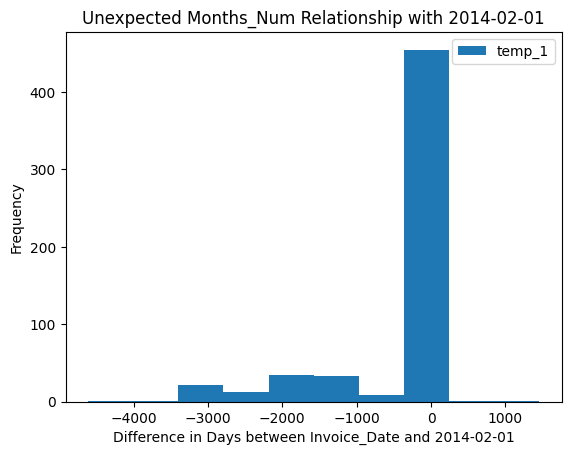

In [167]:
mask = (df_train['monthly_cap'] != 50) & (df_train['monthly_cap'] != 200) & (df_train['monthly_cap'] != 300) & (df_train['monthly_cap'].notna())
df_temp = df_train[mask].copy()
df_temp['temp_1'] = (df_temp['invoice_date'] - pd.to_datetime('2014-02-01')).dt.days.values
mask_2 = (df_temp['temp_1'] > 0) & (df_temp['temp_1'] < 29)
print(f"Rows with unexpected \'monthly_cap\': occurring in 2014-02-XX / occuring at another date (total): {sum(mask_2)} / {len(df_temp)-sum(mask_2)} ({len(df_temp)}).")
df_temp.plot(kind='hist',column=['temp_1'], title='Unexpected Months_Num Relationship with 2014-02-01', xlabel='Difference in Days between Invoice_Date and 2014-02-01', ylabel='Frequency')

THIS WAS WHEN USAGE_3 and USAGE_4 WAS FIRST INTRODUCED!!!

Clearly, having a 'monthly_cap' == 50 for 'mtr_tariff' != 10 is very unexpected (2/127003). Below is one of the instances:

In [139]:
mask = (df_train['client_id'] == 'train_Client_34393') & (df_train['mtr_id'] == 18594520)
df_temp = df_train[mask]
df_temp['monthly_usage_calc'] = df_temp['usage_n'].div(df_temp['months_num_calc'].round(0))
col_names = ['invoice_date', 'mtr_status', 'mtr_code', 'mtr_notes', 'usage_1', 'usage_2', 'usage_3', 'usage_4', 'usage_n', 'months_num', 'monthly_usage', 'months_num_calc', 'monthly_usage_calc', 'monthly_cap', 'mtr_val_old', 'mtr_val_new']
df_temp[col_names].tail(20)

C:\Users\mhoss\AppData\Local\Temp\ipykernel_4048\46075668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['monthly_usage_calc'] = df_temp['usage_n'].div(df_temp['months_num_calc'].round(0))


,invoice_date,mtr_status,mtr_code,mtr_notes,usage_1,usage_2,usage_3,usage_4,usage_n,months_num,monthly_usage,months_num_calc,monthly_usage_calc,monthly_cap,mtr_val_old,mtr_val_new
2020216,2013-09-03,0,453,9,600,2558,0,0,3158.0,2.0,1579.000000,2.1,1579.000,300.0,159340.0,162498.0
2020217,2013-10-02,0,453,9,300,1387,0,0,1687.0,1.0,1687.000000,1.0,1687.000,300.0,162498.0,164185.0
2020218,2013-11-07,0,453,9,300,399,0,0,699.0,1.0,699.000000,1.2,699.000,300.0,164185.0,164884.0
2020219,2014-02-26,0,453,9,200,100,200,7013,7513.0,4.0,1878.250000,3.6,1878.250,50.0,164884.0,172397.0
2020220,2014-06-24,0,453,9,800,400,800,4243,6243.0,4.0,1560.750000,3.9,1560.750,200.0,172397.0,178640.0
2020221,2015-03-04,0,453,8,1600,800,1600,9602,13602.0,8.0,1700.250000,8.3,1700.250,200.0,178640.0,192242.0
2020222,2015-11-02,0,453,8,1600,800,1600,10278,14278.0,8.0,1784.750000,8.0,1784.750,200.0,192242.0,206520.0
2020223,2016-03-03,0,453,8,800,400,800,2877,4877.0,4.0,1219.250000,4.0,1219.250,200.0,206520.0,211397.0
2020224,2016-11-02,0,453,8,1600,800,1600,8223,12223.0,8.0,1527.875000,8.0,1527.875,200.0,211397.0,223620.0
2020225,2017-03-01,0,453,9,800,400,800,4516,6516.0,4.0,1629.000000,3.9,1629.000,200.0,223620.0,230136.0


The record at 'invoice_date' == '2014-02-26' would have a much more typical 'monthly_cap' if 'months_num' == 1; matching the majority of its older records. However, the meter values perfectly align, and there is no clear gap or overlap in dates. Furthermore, the 'monthly_usage' seems somewhat typical, and the change would make it very unusually high (~7.5k).

This unexpected value occurs as the meter settings are changed: as witnessed by the new use of 'usage_3' and 'usage_4' beyond this point. Similarly, the 'monthly_cap' shifts from 300 to 200 (ignoring the case of 50). One solution would be to reallocate the usage in accordance to expectations of 'monthly_cap' = 200. This would make 'usage_1' = 800, 'usage_2' = 400, 'usage_3' = 800 'usage_4' = 5513. However, this does not address the previous record's ('invoice_date' == '2013-11-07') suspiciously low usage. If the two rows redistributed the usage, it would give a much more typical 'monthly_usage' of 1.6k for both rows.

This is simply too complicated to attempt addressing programmatically to be worth the time / effort.

In [144]:
mask = (df_train['client_id'] == 'train_Client_111514') & (df_train['mtr_id'] == 253236)
df_temp = df_train[mask]
df_temp['monthly_usage_calc'] = df_temp['usage_n'].div(df_temp['months_num_calc'].round(0))
col_names = ['invoice_date', 'mtr_status', 'mtr_code', 'mtr_notes', 'usage_1', 'usage_2', 'usage_3', 'usage_4', 'usage_n', 'months_num', 'monthly_usage', 'months_num_calc', 'monthly_usage_calc', 'monthly_cap', 'mtr_val_old', 'mtr_val_new']
df_temp[col_names].tail(20)

C:\Users\mhoss\AppData\Local\Temp\ipykernel_4048\2314870602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['monthly_usage_calc'] = df_temp['usage_n'].div(df_temp['months_num_calc'].round(0))


,invoice_date,mtr_status,mtr_code,mtr_notes,usage_1,usage_2,usage_3,usage_4,usage_n,months_num,monthly_usage,months_num_calc,monthly_usage_calc,monthly_cap,mtr_val_old,mtr_val_new
418070,2010-10-28,0,203,6,539,0,0,0,539.0,4.0,134.750000,3.9,134.750000,NaN,10315.0,10854.0
418071,2011-03-10,0,203,6,564,0,0,0,564.0,4.0,141.000000,4.4,141.000000,NaN,10854.0,11418.0
418072,2011-07-05,0,203,6,557,0,0,0,557.0,4.0,139.250000,3.8,139.250000,NaN,11418.0,11975.0
418073,2011-11-02,0,203,6,706,0,0,0,706.0,4.0,176.500000,3.9,176.500000,NaN,11975.0,12681.0
418074,2012-03-07,0,203,6,1074,0,0,0,1074.0,4.0,268.500000,4.1,268.500000,NaN,12681.0,13755.0
418075,2012-07-04,0,203,6,845,0,0,0,845.0,4.0,211.250000,3.9,211.250000,NaN,13755.0,14600.0
418076,2012-11-07,0,203,6,1200,214,0,0,1414.0,4.0,353.500000,4.1,353.500000,300.000000,14600.0,16014.0
418077,2013-03-12,0,203,6,1200,38,0,0,1238.0,4.0,309.500000,4.1,309.500000,300.000000,16014.0,17252.0
418078,2014-02-26,0,203,8,2000,277,0,0,2277.0,11.0,207.000000,11.5,189.750000,181.818182,17252.0,19529.0
418079,2014-06-24,0,203,8,776,0,0,0,776.0,4.0,194.000000,3.9,194.000000,NaN,19529.0,20305.0


The record at 'invoice_date' == '2014-02-26' would have a much more typical 'monthly_cap' if 'months_num' == 10. However, the meter values perfectly align, and there is no clear gap or overlap in dates.

The 'monthly_cap' seems to shift from 300 to 200 at this point. This is similar to the case prior.


In [145]:
mask = (df_train['client_id'] == 'train_Client_29212') & (df_train['mtr_id'] == 320577)
df_temp = df_train[mask]
df_temp['monthly_usage_calc'] = df_temp['usage_n'].div(df_temp['months_num_calc'].round(0))
col_names = ['invoice_date', 'mtr_status', 'mtr_code', 'mtr_notes', 'usage_1', 'usage_2', 'usage_3', 'usage_4', 'usage_n', 'months_num', 'monthly_usage', 'months_num_calc', 'monthly_usage_calc', 'monthly_cap', 'mtr_val_old', 'mtr_val_new']
df_temp[col_names].tail(20)

C:\Users\mhoss\AppData\Local\Temp\ipykernel_4048\1504996419.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['monthly_usage_calc'] = df_temp['usage_n'].div(df_temp['months_num_calc'].round(0))


,invoice_date,mtr_status,mtr_code,mtr_notes,usage_1,usage_2,usage_3,usage_4,usage_n,months_num,monthly_usage,months_num_calc,monthly_usage_calc,monthly_cap,mtr_val_old,mtr_val_new
1833443,2008-04-28,0,203,6,284,0,0,0,284.0,4.0,71.000000,4.1,71.000000,NaN,18785.0,19069.0
1833444,2008-08-25,0,203,9,1026,0,0,0,1026.0,4.0,256.500000,3.9,256.500000,NaN,19069.0,20095.0
1833445,2008-12-24,0,203,6,461,0,0,0,461.0,4.0,115.250000,4.0,115.250000,NaN,20095.0,20556.0
1833446,2009-04-28,0,203,6,550,0,0,0,550.0,4.0,137.500000,4.1,137.500000,NaN,20556.0,21106.0
1833447,2009-08-24,0,203,6,1174,0,0,0,1174.0,4.0,293.500000,3.9,293.500000,NaN,21106.0,22280.0
1833448,2009-12-28,0,203,8,818,0,0,0,818.0,4.0,204.500000,4.1,204.500000,NaN,22280.0,23098.0
1833449,2010-03-08,0,203,8,382,0,0,0,382.0,2.0,191.000000,2.3,191.000000,NaN,23098.0,23480.0
1833450,2010-07-01,0,203,6,759,0,0,0,759.0,4.0,189.750000,3.8,189.750000,NaN,23480.0,24239.0
1833451,2010-10-28,0,203,6,1200,302,0,0,1502.0,4.0,375.500000,3.9,375.500000,300.000000,24239.0,25741.0
1833452,2011-03-10,0,203,6,1120,0,0,0,1120.0,4.0,280.000000,4.4,280.000000,NaN,25741.0,26861.0


In [146]:
mask = (df_train['client_id'] == 'train_Client_71143') & (df_train['mtr_id'] == 843671)
df_temp = df_train[mask]
df_temp['monthly_usage_calc'] = df_temp['usage_n'].div(df_temp['months_num_calc'].round(0))
col_names = ['invoice_date', 'mtr_status', 'mtr_code', 'mtr_notes', 'usage_1', 'usage_2', 'usage_3', 'usage_4', 'usage_n', 'months_num', 'monthly_usage', 'months_num_calc', 'monthly_usage_calc', 'monthly_cap', 'mtr_val_old', 'mtr_val_new']
df_temp[col_names].tail(20)

C:\Users\mhoss\AppData\Local\Temp\ipykernel_4048\239397136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['monthly_usage_calc'] = df_temp['usage_n'].div(df_temp['months_num_calc'].round(0))


,invoice_date,mtr_status,mtr_code,mtr_notes,usage_1,usage_2,usage_3,usage_4,usage_n,months_num,monthly_usage,months_num_calc,monthly_usage_calc,monthly_cap,mtr_val_old,mtr_val_new
3333309,2006-12-07,0,203,6,771,0,0,0,771.0,4.0,192.750000,3.9,192.750000,NaN,36252.0,37023.0
3333310,2007-04-16,0,203,6,885,0,0,0,885.0,4.0,221.250000,4.3,221.250000,NaN,37023.0,37908.0
3333311,2007-08-10,0,203,6,353,0,0,0,353.0,4.0,88.250000,3.8,88.250000,NaN,37908.0,38261.0
3333312,2008-04-15,0,203,6,1765,0,0,0,1765.0,8.0,220.625000,8.2,220.625000,NaN,38261.0,40026.0
3333313,2008-12-11,0,203,6,1567,0,0,0,1567.0,8.0,195.875000,7.9,195.875000,NaN,40026.0,41593.0
3333314,2009-04-16,0,203,6,989,0,0,0,989.0,4.0,247.250000,4.1,247.250000,NaN,41593.0,42582.0
3333315,2009-08-11,0,203,6,711,0,0,0,711.0,4.0,177.750000,3.8,177.750000,NaN,42582.0,43293.0
3333316,2011-06-28,0,203,6,714,0,0,0,714.0,4.0,178.500000,22.5,32.454545,NaN,47561.0,48275.0
3333317,2012-11-01,0,207,8,2357,0,0,0,2357.0,16.0,147.312500,16.1,147.312500,NaN,48275.0,50632.0
3333318,2013-03-05,0,207,9,1200,2041,0,0,3241.0,4.0,810.250000,4.1,810.250000,300.000000,50632.0,53873.0


##### Imputing 'months_num' (1 of 2)
There were some fields that were missing 'months_num' field due to prior data corruption. The importance of 'months_num' is that it gives a direct time-scale for 'usage_n'. This is especially important for the first record of a given group as there would be little-to-no other indications for time-scale otherwise.



The imputing is split into two sections, the first section is considered more reliable, the second is considered a series of fallbacks. Ideally, the records would have had no 'gaps' over overlaps in 'invoice_date' periods, and so that could have been used to estimate 'months_num'. Unfortunately, that was shown to be quite unreliable. Instead, looking at other trends identified to impute where possible. 



An important note is that only 'mtr_tariff' == 10 | 11 have 'monthly_cap' values. 

The following rules were deduced by inspecting the data:
1. If('mtr_coef' > 1) and If(usage_1 == {200|300}), then ('monthly_cap' = {200|300})
2. If('mtr_coef' > 1) and If(usage_3 > 0), then ('monthly_cap' = 200)

In [111]:
# Apply Rule 1
mask = (df_train['months_num'].isna()) & ((df_train['usage_1'] == 200) | (df_train['usage_1'] == 300))
df_temp = df_train[mask]
print(f"Rows with \'months_num\' adjusted / Rows missing \'months_num\': ({sum(mask)}/{sum(df_train['months_num'].isna())}).")
df_train['months_num_adj'] = 0
df_train.loc[mask, 'months_num_adj'] = 1
df_train.loc[mask, 'monthly_cap'] = df_train.loc[mask, 'usage_1']
df_train.loc[mask, 'months_num'] = 1

Rows with 'months_num' adjusted / Rows missing 'months_num': (321/1426).


In [112]:
# Apply Rule 2
mask = (df_train['months_num'].isna()) & (df_train['usage_3'] > 0)
df_temp = df_train[mask]
print(f"Rows with \'months_num\' adjusted / Rows missing \'months_num\': ({sum(mask)}/{sum(df_train['months_num'].isna())}).")
df_train.loc[mask, 'months_num_adj'] = 1
df_train.loc[mask, 'monthly_cap'] = 200
df_train.loc[mask, 'months_num'] = df_train.loc[mask, 'usage_1'] / 200

Rows with 'months_num' adjusted / Rows missing 'months_num': (28/1105).


##### Correcting 'months_num' (1 of 2) 
Based on the derived 'monthly_cap' metric, some 'months_num' values seem unexpected. These will be adjusted here. 

However, since 'monthly_cap' is unreliable, will be very cautious in which will be adjusted. This operation will be repeated again near the end.

By far the most common values are 50, 200, 300. So much so, that other values seem suspect. Going to compare against using 'months_num_calc', which itself is unreliable. Will consider three variants:
* Rounding 'months_num_calc'
* Rounding Down 'months_num_calc'
* Rounding Up 'months_num_calc'

Rules to replace 'months_num':
* If(abs('mtr_val_old' - 'mtr_val_new_prv') < 3)
   * Perfectly aligned meter values
* If('monthly_cap' != (50|200|300))
   * Unexpected 'monthly_cap' value(s)
* If('monthly_cap_calc' == (50|200|300))
   * Expected 'months_num' value(s)
* If('monthly_cap_calc' is in group's unique(monthly_cap)))
   * The value has already been seen in 'monthly_cap' for this group
   * If there are no existing values in group, then it will be accepted if other criteria is met.

This is overall, a very onerous set of requirements to hopefully ensure to mistakes are introduced (at the cost of some mistakes not being fixed).

In [101]:
def Calc_Adj_Months(df):
    # Focussing on those with unusual 'monthly_cap' and usual 'monthly_cap_calc':
    mask = ((df['monthly_cap'] != 50) & (df['monthly_cap'] != 200) & (df['monthly_cap'] != 300))
    mask_2 = (df['monthly_cap_calc'] == 50) | (df['monthly_cap_calc'] == 200) | (df['monthly_cap_calc'] == 300)
    mask = mask & mask_2
    mask_2 = (((df['mtr_val_old'] - df['mtr_val_new_prv']).abs() < 3) & (df['mtr_val_new_prv'].notna())) # perfect meter alignment, allowing tolerance, and no previous value available
    mask = mask & mask_2
    # Store those potentially valid in 'temp_1', and use 'temp_2' to flag validity
    df['temp_1'] = np.nan
    df.loc[mask, 'temp_1'] = df.loc[mask, 'monthly_cap_calc']
    df['temp_2'] = (df['temp_1'].notna()).astype(int)
    df['temp_2'] = df.groupby(grp_cols, observed=True)['temp_2'].transform('max') # Only go through groups that have at least one potentially valid
    mask_2 = (df['temp_2'] == 1)
    df_temp = df[mask_2].groupby(grp_cols, observed=True)
    for name, group in df_temp:
        mask_3 = group['monthly_cap'].dropna().unique()
        df.loc[group.index, 'temp_2'] = ((group['temp_1'].isin(mask_3)) | ((len(mask_3) == 0) & (group['temp_1'].notna()))).astype(int) # If proposed value has been seen in group before
    mask = (df['temp_2'] == 1)
    print(f"Rows with alternative \'months_num\': Accepted / Rejected (Total): {sum(mask)} / {sum(df['temp_1'].notna())-sum(mask)} ({sum(df['temp_1'].notna())}).")
    df.loc[mask, 'months_num_adj'] = 1
    df.loc[mask, 'monthly_cap'] = df.loc[mask, 'temp_1']
    df.loc[mask, 'months_num'] = df.loc[mask, 'usage_1'].div(df.loc[mask, 'monthly_cap'])
    return df.copy()

In [102]:
mask = df_train['usage_2'] > 0 # only mtr_tariff 10 or 11 would apply to this
df_train['months_num_adj'] = 0
# Starting with Rounding:
df_train['monthly_cap_calc'] = np.nan 
df_train.loc[mask, 'monthly_cap_calc'] = df_train.loc[mask, 'usage_1'].div(df_train.loc[mask, 'months_num_calc'].round(0))
df_train = Calc_Adj_Months(df_train.copy())
# Rounding down:
df_train['monthly_cap_calc'] = np.nan 
df_train.loc[mask, 'monthly_cap_calc'] = df_train.loc[mask, 'usage_1'].div(np.floor(df_train.loc[mask, 'months_num_calc']))
df_train = Calc_Adj_Months(df_train.copy())
mask_2 = (df_train['temp_2'] == 1)
# Rounding up:
df_train['monthly_cap_calc'] = np.nan 
df_train.loc[mask, 'monthly_cap_calc'] = df_train.loc[mask, 'usage_1'].div(np.ceil(df_train.loc[mask, 'months_num_calc']))
df_train = Calc_Adj_Months(df_train.copy())
mask_2 = (df_train['temp_2'] == 1)

Rows with alternative 'months_num': Accepted / Rejected (Total): 374 / 42 (416).
Rows with alternative 'months_num': Accepted / Rejected (Total): 2 / 24 (26).
Rows with alternative 'months_num': Accepted / Rejected (Total): 0 / 29 (29).


In [103]:
df_train['monthly_cap'] = np.nan
mask = df_train['usage_2'] > 0 # only mtr_tariff 10 or 11 would apply to this
df_train.loc[mask, 'monthly_cap'] = df_train.loc[mask, 'usage_1'].div(df_train.loc[mask, 'months_num'])
print(f"Rows with missing \'months_num\': {sum(df_train['months_num'].isna())}.")
print(len(df_train['monthly_cap'].value_counts()))
df_train['monthly_cap'].value_counts()

Rows with missing 'months_num': 1050.
23


monthly_cap
200.000000    336513
300.000000    195557
50.000000     127003
100.000000       292
133.333333       122
150.000000        63
600.000000        42
450.000000        11
75.000000          8
66.666667          4
181.818182         4
120.000000         3
400.000000         3
360.000000         3
900.000000         2
375.000000         2
166.666667         2
175.000000         2
55.555556          1
20.000000          1
58.333333          1
62.500000          1
57.142857          1
Name: count, dtype: int64

In [ ]:
df_train['monthly_cap'] = np.nan
mask = df_train['usage_2'] > 0 # only mtr_tariff 10 or 11 would apply to this
df_train.loc[mask, 'monthly_cap'] = df_train.loc[mask, 'usage_1'].div(df_train.loc[mask, 'months_num'])
print(f"Rows with missing \'months_num\': {sum(df_train['months_num'].isna())}.")
print(len(df_train['monthly_cap'].value_counts()))
df_train['monthly_cap'].value_counts()

Rows with missing 'months_num': 1426.
23


monthly_cap
200.000000    336422
300.000000    195272
50.000000     127003
100.000000       292
133.333333       122
150.000000        63
600.000000        42
450.000000        11
75.000000          8
66.666667          4
181.818182         4
120.000000         3
400.000000         3
360.000000         3
900.000000         2
375.000000         2
166.666667         2
175.000000         2
55.555556          1
20.000000          1
58.333333          1
62.500000          1
57.142857          1
Name: count, dtype: int64

Focussing on those that had unusual values:

#### Inter-Row: Mis-matched Usage
##### Meter "Re-Write" (1 of 2):
It seems that sometimes, the meter is "reset" to retroactively adjust values. A complication is that this somewhat overlaps with a seperate issue of meter "roll over" when it exceeds maximum number of digits.

The signs of this happening are:
1. 'invoice_date' - 'months_num' >= Prev('invoice_date')
2. 'mtr_val_old' >= 'mtr_val_new_prv' (alternatively, 'mtr_val_new' <= 'mtr_val_old_nxt')

Not all of those breaking the first rule seem out of order, however, neither does removing the row introduce an issue. The 'months_num' seems quite coarse so have to allow for rounding values.

It will typically be the row prior to the one that is "reset" that were "re-written" and will be removed to restore order.

This is split into two steps, in an attempt to disentangle it from the meter "roll over" issue. The logic used is quite repetitive, this is so different cases could be treated differently in the future if wanted. Otherwise, could be consolidated.

The general logic is in the 'Calc_Overlap()' function. Where a value (date or meter reading) relative to the prior row seems out of place, it is first flagged. Any row prior to this, that is out of order of said row, is then flagged for removal. If a row would be out of order compared to multiple rows, precedence is given to the most onerous case (i.e., the earliest date or lowest meter reading).

In [38]:
def Calc_Overlap(df_train, mask, col_name):
    df_train['temp_2'] = df_train.groupby(grp_cols, observed=True)['temp_2'].transform('shift', periods=-1) # Flag row before the newly overlapping row
    # Sometimes, one flagged instance is subsumed by another, using cumulative min in reverse order to override these. 
    df_temp = df_train[grp_cols + ['temp_2']].dropna(subset=['temp_2']) # Broken off into temp df to speed up as most as NaT values.
    df_temp['temp_2'] = df_temp.groupby(grp_cols, observed=True)['temp_2'].transform(lambda x: x.iloc[::-1].cummin().iloc[::-1]) # Keep earliest value mentioned so far, per group, in reverse order
    #df_temp['temp_2'] = df_temp.groupby(grp_cols, observed=True)['temp_2'].apply(lambda x: x[::-1].cummin()[::-1]).to_list() # Keep earliest value mentioned so far, per group, in reverse order
    df_train.loc[df_temp.index, 'temp_2'] = df_temp['temp_2'] # Bring it back in
    df_train['temp_2'] = df_train.groupby(grp_cols, observed=True)['temp_2'].bfill() # Flag all previous within the group
    df_train['temp_2'] = (df_train[col_name] > df_train['temp_2']) & (df_train['temp_2'].notna()) # Flag only those within the overlapping period
    mask = df_train['temp_2'] == True
    return df_train, mask

Looking at those breaking both rules.

In [39]:
mask = ((df_train['date_overlap_invoice'] != 0) | (df_train['date_overlap_months'] != 0)) # Date overlap, no tolerance
mask_2 = ((df_train['mtr_overlap_bkd'] != 0) | (df_train['mtr_overlap_fwd'] != 0)) # Meter overlap, no tolerance
print(f"Rows with overlapping: meters / dates (meters and dates / meters or dates): {sum(mask_2)} / {sum(mask)} ({sum(mask & mask_2)} / {sum(mask | mask_2)}).")
mask = mask & mask_2
# 'invoice_date_prv_calc' is 'invoice_date'-'months_num'. Adding matching tolerance as used in 'date_overlap_invoice'
df_train['temp_1'] = 2.0 # Date tolerance to be used
df_train.loc[(df_train['months_num'] < 3), 'temp_1'] = 1.5 # Shrink tolerance if expected invoice span is small
df_train['temp_2'] = pd.to_datetime(np.nan)
df_train.loc[mask, 'temp_2'] = (df_train['invoice_date_prv_calc'] + pd.to_timedelta(df_train['temp_1']*30.5, unit='days')) # This is the date being sought after, with tolerance
df_train, mask = Calc_Overlap(df_train, mask, 'invoice_date') # Flag rows within overlapping period of subsequent rows, with tolerance
print(f"Rows overlapped / total Rows: {sum(mask)} / {len(df_train)}.")
df_temp = df_train[mask]
col_names = ['invoice_date_prv', 'invoice_date_prv_calc', 'months_num', 'invoice_date', 'mtr_val_old_prv', 'mtr_val_new_prv', 'mtr_val_old', 'mtr_val_new', 'mtr_val_old_nxt', 'mtr_val_new_nxt']
df_temp[col_names].head()

Rows with overlapping: meters / dates (meters and dates / meters or dates): 22517 / 2006779 (8522 / 2020774).
Rows overlapped / total Rows: 388 / 4372855.


,invoice_date_prv,invoice_date_prv_calc,months_num,invoice_date,mtr_val_old_prv,mtr_val_new_prv,mtr_val_old,mtr_val_new,mtr_val_old_nxt,mtr_val_new_nxt
9146,2007-12-17,2007-12-06,2.0,2008-02-05,0.0,23475.0,23475.0,23475.0,22348.0,23475.0
22545,2010-12-14,2011-02-08,4.0,2011-06-10,3377.0,3745.0,3745.0,3745.0,0.0,4471.0
26308,2007-09-26,2007-12-09,2.0,2008-02-08,11395.0,11397.0,11771.0,11771.0,11397.0,11771.0
60096,2014-06-25,2014-06-27,8.0,2015-02-26,6313.0,6743.0,6743.0,43089.0,6743.0,6743.0
97837,NaT,2009-02-01,2.0,2009-04-03,NaN,NaN,0.0,2.0,0.0,68.0


In [40]:
# Remove those flagged
df_train['mtr_reset'] = mask.astype(int)
df_train, df_removed, df_temp = Remove_Rows(df_train.copy(), mask, 'mtr_reset', df_removed.copy())
df_temp[col_names].head()
df_train = Calc_Sort(df_train, 'usage_n')
df_train = Calc_Order(df_train)
df_train = Check_Order(df_train)

Rows to be removed / out of rows requested to be removed: 388 / 388.
Rows with backward overlapping meters: (with) without tolerance / Total Rows: (11060) 11182 / 4143468. Excluded NAs: 228999.
Rows with forward overlapping meters: (with) without tolerance / Total Rows: (11060) 11182 / 4143468. Excluded NAs: 228999.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (3023) 2006445 / 4371042. Excluded NAs: 1425.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (2963) 1704023 / 4371042. Excluded NAs: 1425.


Looking at those breaking rule 1 but not rule 2:
* If meter currently in perfect alignment:
    * Only remove prior rows if also leads to perfect meter alignment ('mtr_val_old' == 'mtr_val_new_prv'), with tolerance.
* If meter currently in order but not in perfect alignment:
    * Only remove prior rows if leads to meter being in order ('mtr_val_old' >= 'mtr_val_new_prv'), with tolerance.

The logic here is to not worsen the state of alignment by the changes.

In [41]:
# Looking at those currently in perfect meter alignment, with tolerance
mask = ((df_train['date_overlap_invoice'] != 0) | (df_train['date_overlap_months'] != 0)) # Date overlap, no tolerance
mask_2 = ((((df_train['mtr_val_new'] - df_train['mtr_val_old_nxt']).abs() < 3) | (df_train['mtr_val_old_nxt'].isna())) |
          (((df_train['mtr_val_old'] - df_train['mtr_val_new_prv']).abs() < 3) | (df_train['mtr_val_new_prv'].isna())))
mask = mask & mask_2
# 'invoice_date_prv_calc' is 'invoice_date'-'months_num'. Adding matching tolerance as used in 'date_overlap_invoice'
df_train['temp_1'] = 2.0 # Date tolerance to be used
df_train.loc[(df_train['months_num'] < 3), 'temp_1'] = 1.5 # Shrink tolerance if expected invoice span is small
df_train['temp_2'] = pd.to_datetime(np.nan)
df_train.loc[mask, 'temp_2'] = (df_train['invoice_date_prv_calc'] + pd.to_timedelta(df_train['temp_1']*30.5, unit='days')) # This is the date being sought after, with tolerance
df_train, mask = Calc_Overlap(df_train, mask, 'invoice_date') # Flag rows within overlapping period of subsequent rows, with tolerance
# Want to check whether removing these improves alignment.
df_temp = df_train[df_train['temp_2'] == False].copy() # Comparison case
print("vvv Ignore outputs below! vvv")
df_temp = Calc_Sort(df_temp, 'usage_n')
df_temp = Calc_Order(df_temp) # Update values
df_temp = Check_Order(df_temp) # Update values
print("^^^ Ignore outputs above! ^^^")
df_temp['temp_1'] = ((((df_temp['mtr_val_new'] - df_temp['mtr_val_old_nxt']).abs() > 2) & (df_temp['mtr_val_old_nxt'].notna())) |
                     (((df_temp['mtr_val_old'] - df_temp['mtr_val_new_prv']).abs() > 2) & (df_temp['mtr_val_new_prv'].notna()))) # Non-perfect alignment, with tolerance
df_train['temp_1'] = ((((df_train['mtr_val_new'] - df_train['mtr_val_old_nxt']).abs() > 3) & (df_train['mtr_val_old_nxt'].notna())) |
                      (((df_train['mtr_val_old'] - df_train['mtr_val_new_prv']).abs() > 3) & (df_train['mtr_val_new_prv'].notna())))
# Only those that reduces number of meter overlaps kept
mask = (df_temp.groupby(grp_cols, observed=True)['temp_1'].agg('sum') < df_train.groupby(grp_cols, observed=True)['temp_1'].agg('sum')).reset_index()
mask = mask[mask['temp_1'] == True]
df_train['temp_1'] = df_train.set_index(grp_cols).index.isin(mask.set_index(grp_cols).index) # Flagging the groups where it was improvement
mask = (df_train['temp_1'] == True)
mask_2 = (df_train['temp_2'] == True)
print(f'Rows with meters overlapped: Rows that would align perfectly if removed / would not align (Total rows with perfect meters alignment but overlapped dates): {sum(mask&mask_2)} / {sum((~mask)&mask_2)} ({sum(mask)}).')
del df_temp

vvv Ignore outputs below! vvv
Rows with backward overlapping meters: (with) without tolerance / Total Rows: (11037) 11159 / 4140483. Excluded NAs: 228999.
Rows with forward overlapping meters: (with) without tolerance / Total Rows: (11037) 11159 / 4140483. Excluded NAs: 228999.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (72) 2003672 / 4368057. Excluded NAs: 1425.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (71) 1701290 / 4368057. Excluded NAs: 1425.
^^^ Ignore outputs above! ^^^
Rows with meters overlapped: Rows that would align perfectly if removed / would not align (Total rows with perfect meters alignment but overlapped dates): 139 / 2846 (2443).


In [42]:
# Remove those flagged
mask = mask & mask_2
df_train.loc[mask, 'mtr_reset'] = 1
df_train, df_removed, df_temp = Remove_Rows(df_train.copy(), mask, 'mtr_reset', df_removed.copy())
df_temp[col_names].head()
df_train = Calc_Sort(df_train, 'usage_n')
df_train = Calc_Order(df_train)
df_train = Check_Order(df_train)

Rows to be removed / out of rows requested to be removed: 139 / 139.
Rows with backward overlapping meters: (with) without tolerance / Total Rows: (11037) 11159 / 4143329. Excluded NAs: 228999.
Rows with forward overlapping meters: (with) without tolerance / Total Rows: (11037) 11159 / 4143329. Excluded NAs: 228999.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (2899) 2006322 / 4370903. Excluded NAs: 1425.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (2848) 1703900 / 4370903. Excluded NAs: 1425.


In [43]:
# Looking at those currently in meter alignment but not perfectly, with tolerance
mask = ((df_train['date_overlap_invoice'] != 0) | (df_train['date_overlap_months'] != 0)) # Date overlap, no tolerance
mask_2 = ((df_train['mtr_overlap_bkd'] == 0) | (df_train['mtr_overlap_fwd'] == 0)) # No Meter overlap, with tolerance
mask = mask & mask_2
# 'invoice_date_prv_calc' is 'invoice_date'-'months_num'. Adding matching tolerance as used in 'date_overlap_invoice'
df_train['temp_1'] = 2.0 # Date tolerance to be used
df_train.loc[(df_train['months_num'] < 3), 'temp_1'] = 1.5 # Shrink tolerance if expected invoice span is small
df_train['temp_2'] = pd.to_datetime(np.nan)
df_train.loc[mask, 'temp_2'] = (df_train['invoice_date_prv_calc'] + pd.to_timedelta(df_train['temp_1']*30.5, unit='days')) # This is the date being sought after, with tolerance
df_train, mask = Calc_Overlap(df_train, mask, 'invoice_date') # Flag rows within overlapping period of subsequent rows, with tolerance
# Want to check whether removing these improves alignment.
df_temp = df_train[df_train['temp_2'] == False].copy() # Comparison case
print("vvv Ignore outputs below! vvv")
df_temp = Calc_Sort(df_temp, 'usage_n')
df_temp = Calc_Order(df_temp) # Update values
df_temp = Check_Order(df_temp) # Update values
print("^^^ Ignore outputs above! ^^^")
df_temp['temp_1'] = ((df_temp['mtr_overlap_bkd'] == -1) | (df_temp['mtr_overlap_fwd'] == -1)) # Meter overlap, with tolerance (previous test was for perfect alignment)
df_train['temp_1'] = ((df_train['mtr_overlap_bkd'] == -1) | (df_train['mtr_overlap_fwd'] == -1))
# Only those that reduces number of meter overlaps kept
mask = (df_temp.groupby(grp_cols, observed=True)['temp_1'].agg('sum') < df_train.groupby(grp_cols, observed=True)['temp_1'].agg('sum')).reset_index()
mask = mask[mask['temp_1'] == True]
df_train['temp_1'] = df_train.set_index(grp_cols).index.isin(mask.set_index(grp_cols).index) # Flagging the groups where it was improvement
mask = (df_train['temp_1'] == True)
mask_2 = (df_train['temp_2'] == True)
print(f'Rows with meters overlapped: Rows that would align (inc. non-perfectly) if removed / would not align (Total rows with imperfect meters alignment but overlapped dates): {sum(mask&mask_2)} / {sum((~mask)&mask_2)} ({sum(mask)}).')
del df_temp

vvv Ignore outputs below! vvv
Rows with backward overlapping meters: (with) without tolerance / Total Rows: (11034) 11156 / 4140411. Excluded NAs: 228999.
Rows with forward overlapping meters: (with) without tolerance / Total Rows: (11034) 11156 / 4140411. Excluded NAs: 228999.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (0) 2003611 / 4367985. Excluded NAs: 1425.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (0) 1701223 / 4367985. Excluded NAs: 1425.
^^^ Ignore outputs above! ^^^
Rows with meters overlapped: Rows that would align (inc. non-perfectly) if removed / would not align (Total rows with imperfect meters alignment but overlapped dates): 3 / 2915 (59).


In [44]:
# Remove those flagged
mask = mask & mask_2
df_train.loc[mask, 'mtr_reset'] = 1
df_train, df_removed, df_temp = Remove_Rows(df_train.copy(), mask, 'mtr_reset', df_removed.copy())
df_temp[col_names].head()
df_train = Calc_Sort(df_train, 'usage_n')
df_train = Calc_Order(df_train)
df_train = Check_Order(df_train)

Rows to be removed / out of rows requested to be removed: 3 / 3.
Rows with backward overlapping meters: (with) without tolerance / Total Rows: (11034) 11156 / 4143326. Excluded NAs: 228999.
Rows with forward overlapping meters: (with) without tolerance / Total Rows: (11034) 11156 / 4143326. Excluded NAs: 228999.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (2896) 2006320 / 4370900. Excluded NAs: 1425.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (2845) 1703899 / 4370900. Excluded NAs: 1425.


Note that this leaves behind two sets of cases:
1. Those with overlapping invoice spans but with meters in order: where removing rows degrades alignment. 
   * Sub-set of breaking rule 1 but not rule 2.
2. Those that do not have overlapping 'months_num' but with meters out of order. 
   * Breaking rule 2 but not rule 1.

Will return to these later.

#### "Reset" Meter: Rollover
There is also a "rollover" issue with the 'mtr_val_{old|new}' columns, where some reset after exceeding 100000 | 1000000 back down to 0. Two scenarios:
* Rollover occurs within a row (intra-row)
* Rollover occurs between a row (it is assumed this requires a "gap" in dates) (inter-row)

One complication is that it is not clear what the cap is for a given meter, and this has to be inferred based on what caused the rollover. Where possible, looking to add amount to fix issue.

##### Inter-Row:
Unfortunately, it seems quite hard to distinguish meter rolling over from a meter re-write at times. The settled upon rules are:
* Sufficient Time:
   * Must have unaccounted gap in invoice spans in which meter could have rolled over.
* Sufficient Usage:
   * Previous month's monthly usage projected forwards into the gap must be enough to increase number of digits.
   * OR, Current month's monthly usage project backwards into the gap must be enough to cause negative values.
* Qualifiers:
   * The alleged rollover number of digits must be greater than seen prior in the group:
       * For example, cannot claim a rollover at 10000 if there exists a meter readings >10000 already.
       * It must also be greater than assumed minimum: 9999.
   * The relied upon monthly usage cannot be too abnormal:
       * Within (Median/3) < usage < (Median*3), ignoring those with 0 usage.
   * Meter must not be locked at 0 for both mtr_val_old and mtr_val_new.

In [45]:
# Store max digits seen for a group, assumed constant and that rollover could not happen less than this.
df_train['mtr_max_digit'] = df_train[['mtr_val_old', 'mtr_val_new']].max(axis=1) # value per row
df_train['mtr_max_digit'] = df_train.groupby(grp_cols, observed=True)[['mtr_max_digit']].transform('max') # value per group
df_train['mtr_max_digit'] = 10 ** np.ceil(np.log10(df_train['mtr_max_digit'] + 1)) # Number of digits
# Looking at rollover across rows
df_train['monthly_usage_grp_median'] = df_train['monthly_usage'].replace(0, np.nan)
df_train['monthly_usage_grp_median'] = df_train.groupby(grp_cols, observed=True)['monthly_usage_grp_median'].transform('median')
mask = ((df_train['months_gap_calc'] > 1) & # Must have a gap
        (df_train['usage_n_aux_flag'] == 0) & # Usage must make sense
        (df_train['monthly_usage'] < (df_train['monthly_usage_grp_median'] * 3)) & # Usage not more than triple median 
        ((df_train['monthly_usage'] * 3) > df_train['monthly_usage_grp_median'])) # Usage not less than third median
# Looking if current usage would have caused rollover going backwards:
df_train['temp_1'] = np.nan
df_train.loc[mask, 'temp_1'] = (df_train.loc[mask, 'monthly_usage'] * df_train.loc[mask, 'months_gap_calc']).round(0) # Projected usage
mask_2 = ((df_train['mtr_val_old'] < df_train['temp_1']) & # Had enough (gap * usage) to have caused rollover
          (df_train['mtr_val_new_prv'] + df_train['temp_1'] > df_train['mtr_max_digit']) & # Would have caused highest digit count seen
          (df_train['mtr_val_new_prv'] + df_train['temp_1'] > 9999) & # Minimum rollover point assumed
          (((df_train['mtr_val_new_prv'] + df_train['temp_1']) - (df_train['mtr_val_old'] + df_train['mtr_max_digit'])).abs() < 2000))
# Looking if previous usage would have caused rollover going forwards:
df_train['temp_1'] = np.nan
df_train.loc[mask, 'temp_1'] = (df_train.loc[mask, 'monthly_usage_prv'] * df_train.loc[mask, 'months_gap_calc']).round(0) # Projected usage
mask = ((df_train['mtr_val_new_prv'] + df_train['temp_1'] > df_train['mtr_max_digit']) & # Would have caused highest digit count seen (and so also rollover)
        (df_train['mtr_val_new_prv'] + df_train['temp_1'] > 9999) & # Minimum rollover point assumed
        (((df_train['mtr_val_new_prv'] + df_train['temp_1']) - (df_train['mtr_val_old'] + df_train['mtr_max_digit'])).abs() < 2000))
print(f"Rows suspected of inter-row rollover projecting backwards / those projecting forwards: {sum(mask_2)} / {sum(mask)}.")
# Ignore those that have mtr_val_old and mtr_val_new == 0
mask = (mask | mask_2) 
mask_2 = (df_train['mtr_val_old'] == 0) & (df_train['mtr_val_new'] == 0) 
print(f"Rows suspected of inter-row rollover: deemed fixable / unfixable (total suspected): {sum(mask & ~mask_2)} / {sum(mask & mask_2)} ({sum(mask)}).")
df_train['mtr_old_rollover'] = (mask).astype(int)
df_train.loc[(mask & mask_2), 'mtr_old_rollover'] = -1
col_names = ['client_id', 'invoice_date', 'usage_n', 'mtr_val_new_prv', 'mtr_val_old', 'mtr_val_new', 'mtr_val_old_nxt', 'months_num', 'mtr_val_new_calc', 'mtr_max_digit']
df_temp = df_train[(mask & mask_2) if sum(mask & mask_2)>0 else (mask & ~mask_2)] # Showing those unfixable if they exist, otherwise, just those flagged
df_temp[col_names]

Rows suspected of inter-row rollover projecting backwards / those projecting forwards: 90 / 148.
Rows suspected of inter-row rollover: deemed fixable / unfixable (total suspected): 178 / 0 (178).


,client_id,invoice_date,usage_n,mtr_val_new_prv,mtr_val_old,mtr_val_new,mtr_val_old_nxt,months_num,mtr_val_new_calc,mtr_max_digit
1622,train_Client_100044,2012-12-11,492.0,9977.0,219.0,711.0,711.0,4.0,711.0,10000.0
8876,train_Client_100257,2010-01-26,2171.0,8992.0,2860.0,5031.0,7420.0,4.0,5031.0,10000.0
25205,train_Client_100717,2011-10-13,556.0,9537.0,1429.0,1985.0,1985.0,4.0,1985.0,10000.0
128944,train_Client_103569,2012-12-17,2971.0,85269.0,1305.0,4276.0,NaN,4.0,4276.0,100000.0
131353,train_Client_103636,2012-04-13,127.0,8863.0,3802.0,3929.0,4116.0,2.0,3929.0,10000.0
...,...,...,...,...,...,...,...,...,...,...
4206476,train_Client_95331,2015-05-04,220.0,6501.0,2925.0,3145.0,3145.0,4.0,3145.0,10000.0
4298613,train_Client_97944,2009-08-04,4371.0,97197.0,1478.0,5849.0,5849.0,1.0,5849.0,100000.0
4304767,train_Client_98106,2014-05-26,704.0,9794.0,2066.0,2770.0,2770.0,2.0,2770.0,10000.0
4315287,train_Client_98405,2018-12-19,50.0,9554.0,2632.0,2682.0,NaN,2.0,2682.0,10000.0


##### Intra-Row:
Rules for these:
* Expected values must exceed maximum number of digits seen in a group, and exceed 9999
* EITHER: Monthly usage cannot be too abnormal; within: (Median/3) < usage < (Median*3), ignoring those with 0 usage.
* OR: meter values must align, absolute delta < 3.

In [46]:
mask = ((df_train['monthly_usage'] < (df_train['monthly_usage_grp_median'] * 3)) & # Usage not more than triple median 
        ((df_train['monthly_usage'] * 3) > df_train['monthly_usage_grp_median'])) # Usage not less than third median
mask_2 = (((df_train['mtr_val_new_calc'] - (df_train['mtr_val_new'] + (df_train['usage_n'] + (df_train['usage_aux']*(df_train['usage_aux_flag'] == 1))))).abs() < 3) &
          (df_train['mtr_val_old_nxt'].notna())) # Usage and Meters would align, allowing for rounding errors
mask = (mask | mask_2)
mask_2 = ((df_train['mtr_val_new_calc'] > df_train['mtr_max_digit']) & 
          (df_train['mtr_val_new_calc'] > 9999)) # number of digits > most seen, and > Minimum rollover point
mask = (mask & mask_2)
# From these, only going to make the change if they don't cause alignment issue to their next row after change, and those without blank meter values
mask_2 = (((((df_train['mtr_val_new_calc'] - df_train['mtr_max_digit']) - 3) < df_train['mtr_val_old_nxt']) | # with tolerance
          (df_train['mtr_val_old_nxt'].isna())) &
          ((df_train['mtr_val_old'] != 0) | (df_train['mtr_val_new'] != 0)))
print(f"Rows suspected of intra-row rollover: deemed fixable / unfixable (total suspected): {sum(mask & mask_2)} / {sum(mask & ~mask_2)} ({sum(mask)}).")
df_train['mtr_new_rollover'] = mask.astype(int)
df_train.loc[(mask & ~mask_2), 'mtr_new_rollover'] = -1 
df_temp = df_train[(mask & ~mask_2) if sum(mask & ~mask_2)>0 else (mask & mask_2)] # Showing those unfixable if they exist, otherwise, just those flagged
df_temp[col_names]

Rows suspected of intra-row rollover: deemed fixable / unfixable (total suspected): 1979 / 10 (1989).


,client_id,invoice_date,usage_n,mtr_val_new_prv,mtr_val_old,mtr_val_new,mtr_val_old_nxt,months_num,mtr_val_new_calc,mtr_max_digit
1414813,train_Client_1740,2009-10-29,11263.0,1400.0,1400.0,1400.0,2180.0,16.0,12663.0,10000.0
1997989,train_Client_33768,2011-11-16,14111.0,NaN,0.0,0.0,NaN,4.0,14111.0,1.0
2674970,train_Client_52765,2009-05-15,18287.0,1674.0,1674.0,1674.0,1674.0,32.0,19961.0,10000.0
2737477,train_Client_54535,2008-09-04,10461.0,687.0,687.0,687.0,979.0,16.0,11148.0,10000.0
2890953,train_Client_58758,2009-09-28,23289.0,2204.0,2204.0,2204.0,2560.0,22.0,25493.0,10000.0
3268079,train_Client_69328,2011-08-03,18000.0,2002.0,2002.0,2002.0,2026.0,12.0,20002.0,10000.0
3328909,train_Client_71014,2011-02-04,20236.0,242.0,242.0,242.0,249.0,4.0,20478.0,1000.0
3365437,train_Client_72015,2007-11-08,18117.0,NaN,0.0,0.0,NaN,4.0,18117.0,1.0
3489783,train_Client_75478,2006-10-25,25473.0,3097.0,3097.0,3097.0,3097.0,12.0,28570.0,10000.0
3635271,train_Client_79521,2007-01-23,20043.0,2226.0,2226.0,2226.0,2226.0,16.0,22269.0,10000.0


Once a rollover occurs, it has a knock-on effects. One issue is that multiple rollovers can occur. 
* Inter-Row: 'mtr_old_rollover':
  * 'mtr_val_old' and 'mtr_val_new' needs adjustment every instance.
* Intra-Row: 'mtr_new_rollover':
  * The first instance it occurs, only 'mtr_val_new' needs adjusting, but then all rows after need both that and 'mtr_val_old' adjusting.

The expected 'mtr_val_new_calc' is recalculated after this once more.

In [47]:
# Keeping a track of change made to mtr_val_old and mtr_val new. Combining both mtr_old_rollover and mtr_new_rollover before making the change.
df_train[['mtr_old_adj_quant', 'mtr_new_adj_quant']] = 0
col_names = ['temp_1', 'temp_2']
for mask_name in ['mtr_old_rollover', 'mtr_new_rollover']:
    mask = df_train[mask_name] == 1
    df_train[col_names] = np.nan
    df_train.loc[mask, col_names] = df_train.loc[mask,'mtr_max_digit']
    df_train.loc[mask, col_names] = df_train[mask].groupby(grp_cols, observed=True)[col_names].cumsum() # Count number of instances
    df_train[col_names] = df_train.groupby(grp_cols, observed=True)[col_names].ffill()
    df_train[col_names] = df_train[col_names].fillna(0)
    df_train['mtr_old_adj_quant'] = df_train['mtr_old_adj_quant'] + df_train['temp_1']
    df_train['mtr_new_adj_quant'] = df_train['mtr_new_adj_quant'] + df_train['temp_2']
    print(f"Rows updated due to {mask_name}: {sum(df_train['temp_2'] > 0)}.")
mask = df_train['mtr_new_rollover'] == 1
df_train.loc[mask,'mtr_old_adj_quant'] = df_train.loc[mask,'mtr_old_adj_quant'] - df_train.loc[mask,'mtr_max_digit'] # Ignore first instance for new_rollover
# Update the values
df_train['mtr_val_old'] = df_train['mtr_val_old'] + df_train['mtr_old_adj_quant']
df_train['mtr_val_new'] = df_train['mtr_val_new'] + df_train['mtr_new_adj_quant']

Rows updated due to mtr_old_rollover: 1620.
Rows updated due to mtr_new_rollover: 26281.


In [48]:
# Re-sort and check for the same rule again
df_train = Calc_Usage(df_train)
df_train = Check_Usage(df_train)
df_train = Calc_Order(df_train)
df_train = Check_Order(df_train)

Rows with unexpected 'usage_n' values: (with) without tolerance / Total Rows: (9808) 10147 / 4372325.
Rows allowing 'usage_n_aux' / not allowing: 4145 / 1499. Combined: 5644.
Rows with unexpected 'usage_n_aux' values: (with) without tolerance: (6829) 7170. Blocked 'usage_n_aux': 1499.
Rows with backward overlapping meters: (with) without tolerance / Total Rows: (10871) 10993 / 4143326. Excluded NAs: 228999.
Rows with forward overlapping meters: (with) without tolerance / Total Rows: (10871) 10993 / 4143326. Excluded NAs: 228999.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (2896) 2006320 / 4370900. Excluded NAs: 1425.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (2845) 1703899 / 4370900. Excluded NAs: 1425.


#### Inter-Row: Mis-matched Usage (Continued)
##### Meter "Re-Write" (2 of 2):
Returning to the two sets of cases left previously:
1. Those with overlapping invoice spans but with meters in order: where removing rows degrades alignment. 
   * Sub-set of breaking rule 1 but not rule 2.
2. Those that do not have overlapping 'months_num' but with meters out of order. 
   * Breaking rule 2 but not rule 1.

This section will be a lot more coercive due to time constraints - need to get them in order, even if sacrificing some of the data to do so. Based on this exploration, it seems clear that no column with be ideal to use. 'mtr_val_new' was deemed the overall best metric to rely upon as it should be aligned directly with 'invoice_date', which is assumed always correct.

Looking at case 2: those without overlapping 'months_num' but with meters out of order. Could look to do something about those that have a more "hard" reset, i.e. has consistent history, and then starts again from 0 for another consistent history. For example, these could be split into new different pseudo-'mtr_id' entities. However, given how rare it is and time constraints, this was not done for simplicity here. Similarly, some of these may have been modified to have only the violating data imputed versus being deleted outright.

In [49]:
# Looking at those currently in meter alignment but not perfectly, with tolerance
mask = ((df_train['date_overlap_invoice'] != -1) | (df_train['date_overlap_months'] != -1)) # No Date overlap, with tolerance
mask_2 = ((df_train['mtr_overlap_bkd'] == -1)) # Meter overlap, with tolerance
mask_2 = mask & mask_2
df_train['temp_2'] = np.nan
df_train.loc[mask_2, 'temp_2'] = df_train.loc[mask_2, 'mtr_val_old'] + 2 # This is value to stay under, with tolerance
df_train, mask = Calc_Overlap(df_train, mask_2, 'mtr_val_new') # Flag rows within overlapping period of subsequent rows
print(f'Rows with out of order meter values but ordered dates / Total affected overlapping rows: {sum(mask_2)} / {sum(mask)}.')
df_temp = df_train[mask]
col_names = ['invoice_date_prv', 'invoice_date_prv_calc', 'months_num', 'invoice_date', 'mtr_val_old_prv', 'mtr_val_new_prv', 'mtr_val_old', 'mtr_val_new', 'mtr_val_old_nxt', 'mtr_val_new_nxt']
df_temp[col_names].head()

Rows with out of order meter values but ordered dates / Total affected overlapping rows: 10870 / 17731.


,invoice_date_prv,invoice_date_prv_calc,months_num,invoice_date,mtr_val_old_prv,mtr_val_new_prv,mtr_val_old,mtr_val_new,mtr_val_old_nxt,mtr_val_new_nxt
263,2011-04-14,2011-06-09,2.0,2011-08-09,1385.0,1578.0,1687.0,1893.0,1804.0,1804.0
2423,2012-06-20,2012-06-22,4.0,2012-10-22,51157.0,51644.0,51644.0,52790.0,52290.0,52776.0
2536,2010-01-07,2010-01-03,4.0,2010-05-05,36.0,62.0,62.0,853.0,88.0,104.0
3057,NaT,2008-06-28,4.0,2008-10-28,NaN,NaN,0.0,807.0,753.0,892.0
3917,2008-09-03,2008-09-09,4.0,2009-01-09,87.0,87.0,87.0,4646.0,87.0,87.0


In [50]:
# Remove those flagged
df_train.loc[mask, 'mtr_reset'] = 1
df_train, df_removed, df_temp = Remove_Rows(df_train.copy(), mask, 'mtr_reset', df_removed.copy())
df_temp[col_names].head()
df_train = Calc_Sort(df_train, 'usage_n')
df_train = Calc_Order(df_train)
df_train = Check_Order(df_train)

Rows to be removed / out of rows requested to be removed: 17731 / 17731.
Rows with backward overlapping meters: (with) without tolerance / Total Rows: (1) 139 / 4125595. Excluded NAs: 228999.
Rows with forward overlapping meters: (with) without tolerance / Total Rows: (1) 139 / 4125595. Excluded NAs: 228999.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (2888) 1995207 / 4353175. Excluded NAs: 1419.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (2837) 1694703 / 4353175. Excluded NAs: 1419.


#### Inter-Row: Unexpected 'months_num' (2 of 2)
##### Imputing 'months_num' (1 of 2)
There were some fields that were missing 'months_num' field due to prior data corruption. The importance of 'months_num' is that it gives a direct time-scale for 'usage_n'. This is especially important for the first record of a given group as there would be little-to-no other indications for time-scale otherwise. Now that the records are assumed broadly ordered, 'months_num' will be imputed. Ideally, the records would have had no 'gaps' over overlaps in 'invoice_date' periods, and so that could have been used to estimate 'months_num'. Unfortunately, that was shown to be quite unreliable. Instead, looking at other trends identified to impute where possible. The imputing is split into two sections, the first section is considered more reliable, the second is considered a series of fallbacks.

'monthly_cap' refers to the maximum value for 'usage_1' in cases where it is capped. The cap value for 'usage_1' linearly scales based on 'months_num', and so knowing the 'monthly_cap' and 'usage_1' would be enough to deduce 'months_num'. However, 'monthly_cap' is not a recorded field and must itself be estimated, it is nevertheless used here where possible.

An important note is that only 'mtr_tariff' == 10 | 11 have 'monthly_cap' values. 

#### Inter-Row: Unexpected 'months_num' via 'monthly_cap'
'monthly_cap' refers to the maximum value for 'usage_1' in cases where it is capped. The cap value for 'usage_1' linearly scales based on 'months_num', and so knowing the 'monthly_cap' and 'usage_1' would be enough to deduce 'months_num'. However, 'monthly_cap' is not a recorded field and must itself be estimated, it is nevertheless used here where possible. 

Based on this derived metric, some 'months_num' values seem unexpected. These will be adjusted here. However, since these are unreliable, will be very cautious in which will be adjusted.

* If meter values are aligned perfectly, and 'months_num' seems unexpected ~(50|200|300), and 'months_num_calc' is either (50|200|300) and this value has already been seen in the group in 'months_num', then make then change. 

The importance of 'months_num' is that it gives a direct time-scale for 'usage_n'. This is especially important for the first record of a given group as there would be little-to-no other indications for time-scale otherwise. The focus here is not on those that are missing; they will be imputed later. 

An important note is that only 'mtr_tariff' == 10 | 11 | have 'monthly_cap' values. 
'months_num' does not always seem to match expectations, as seen from the many rare variants above. Since 'months_num' is going to be interpretted as the duration an invoice spans, it was decided to allow its adjustment to align with this.
It seems that sometimes, the meter is "reset" to retroactively adjust values. A complication is that this somewhat overlaps with a seperate issue of meter "roll over" when it exceeds maximum number of digits.

The signs of this happening are:
1. 'invoice_date' - 'months_num' >= Prev('invoice_date')
2. 'mtr_val_old' >= 'mtr_val_new_prv' (alternatively, 'mtr_val_new' <= 'mtr_val_old_nxt')

Not all of those breaking the first rule seem out of order, however, neither does removing the row introduce an issue. The 'months_num' seems quite coarse so have to allow for rounding values.

It will typically be the row prior to the one that is "reset" that were "re-written" and will be removed to restore order.

This is split into two steps, in an attempt to disentangle it from the meter "roll over" issue. The logic used is quite repetitive, this is so different cases could be treated differently in the future if wanted. Otherwise, could be consolidated.


#### Inter-Row: Unexpected 'months_num' (1 of 2)
##### Via Derived 'monthly_cap' 
'monthly_cap' refers to the maximum value for 'usage_1' in cases where it is capped. The cap value for 'usage_1' linearly scales based on 'months_num', and so knowing the 'monthly_cap' and 'usage_1' would be enough to deduce 'months_num'. However, 'monthly_cap' is not a recorded field and must itself be estimated, it is nevertheless used here where possible. 

Based on this derived metric, some 'months_num' values seem unexpected. These will be adjusted here. However, since these are unreliable, will be very cautious in which will be adjusted. This operation will be repeated again near the end.

From this point onwards, it is less clear how to proceed. Going to apply the following rules:
1. If('usage_2' > 0) and If('months_num_calc'/'usage_1' == {200|300}), then ('monthly_cap' = {200|300})
   * 'monthly_cap' = {200|300} are by far the most common values, so will accept them if they seem to fit.
2. If('usage_2' > 0) and If(('months_num_calc'-1)/'usage_1' == {200|300}), then ('monthly_cap' = {200|300})
   * 'months_num_calc' is not very reliable, and when it does not match 'months_num' it tends to be over by 1, so trying the variant to check.
3. If('usage_2' > 0) and If(('months_num_calc'+1)/'usage_1' == {200|300}), then ('monthly_cap' = {200|300})
   * Done after the previous to account for this being a rarer scenario.

In [55]:
# Apply Rule 1
mask = ((df_train['months_num'].isna()) & (df_train['usage_2'] > 0))
df_train['temp_1'] = 0.0
df_train.loc[mask, 'temp_1'] = df_train.loc[mask, 'usage_1'].div(df_train.loc[mask, 'months_num_calc'])
mask = mask & ((df_train['temp_1'] == 200) | (df_train['temp_1'] == 300))
df_temp = df_train.loc[mask]
print(f"Rows with \'months_num\' adjusted / Rows missing \'months_num\': ({sum(mask)}/{sum(df_train['months_num'].isna())}).")
df_train.loc[mask, 'months_num_adj'] = 1
df_train.loc[mask, 'monthly_cap'] = df_train.loc[mask, 'temp_1']
df_train.loc[mask, 'months_num'] = df_train.loc[mask, 'usage_1'].div(df_train['monthly_cap'])

Rows with 'months_num' adjusted / Rows missing 'months_num': (13/1073).


In [56]:
# Apply Rule 2
mask = ((df_train['months_num'].isna()) & (df_train['usage_2'] > 0))
df_train['temp_1'] = 0.0
df_train.loc[mask, 'temp_1'] = df_train.loc[mask, 'usage_1'].div(df_train.loc[mask, 'months_num_calc']-1)
mask = mask & ((df_train['temp_1'] == 200) | (df_train['temp_1'] == 300))
df_temp = df_train.loc[mask]
print(f"Rows with \'months_num\' adjusted / Rows missing \'months_num\': ({sum(mask)}/{sum(df_train['months_num'].isna())}).")
df_train.loc[mask, 'months_num_adj'] = 1
df_train.loc[mask, 'monthly_cap'] = df_train.loc[mask, 'temp_1']
df_train.loc[mask, 'months_num'] = df_train.loc[mask, 'usage_1'].div(df_train['monthly_cap'])

Rows with 'months_num' adjusted / Rows missing 'months_num': (1/1060).


In [57]:
# Apply Rule 3
mask = ((df_train['months_num'].isna()) & (df_train['usage_2'] > 0))
df_train['temp_1'] = 0.0
df_train.loc[mask, 'temp_1'] = df_train.loc[mask, 'usage_1'].div(df_train.loc[mask, 'months_num_calc']+1)
mask = mask & ((df_train['temp_1'] == 200) | (df_train['temp_1'] == 300))
df_temp = df_train.loc[mask]
print(f"Rows with \'months_num\' adjusted / Rows missing \'months_num\': ({sum(mask)}/{sum(df_train['months_num'].isna())}).")
df_train.loc[mask, 'months_num_adj'] = 1
df_train.loc[mask, 'monthly_cap'] = df_train.loc[mask, 'temp_1']
df_train.loc[mask, 'months_num'] = df_train.loc[mask, 'usage_1'].div(df_train['monthly_cap'])

Rows with 'months_num' adjusted / Rows missing 'months_num': (0/1059).


For these final ones, many alternatives seem equally viable / dissatisfactory. Applying following rules:
1. If('mtr_tariff' == 10|11), then Backfill('monthly_cap'), then Frontfill('monthly_cap')
2. If('months_num' == na), and If('monthly_cap' != na), then ('months_num' = 'usage_1'/'monthly_cap')
3. If('months_num' == na), and If('monthly_num_calc' != na), then ('months_num' = 'months_num_calc')
4. If('months_num' == na), then ('months_num' = 'usage_n'/'monthly_usage_grp_median')
5. Else, ('months_num' = 4) <- The most common value.

In [58]:
# Apply Rule 1
df_temp = df_train.groupby(grp_cols, observed=True)
df_train['monthly_cap'] = df_temp['monthly_cap'].bfill()
df_train['monthly_cap'] = df_temp['monthly_cap'].ffill()

In [59]:
# Apply Rule 2
mask = (df_train['months_num'].isna()) & (df_train['monthly_cap'].notna())
df_temp = df_train.loc[mask]
print(f"Rows with \'months_num\' adjusted / Rows missing \'months_num\': ({sum(mask)}/{sum(df_train['months_num'].isna())}).")
df_train.loc[mask, 'months_num_adj'] = 1
df_train.loc[mask, 'months_num'] = df_train.loc[mask, 'usage_1'].div(df_train.loc[mask, 'monthly_cap'])

Rows with 'months_num' adjusted / Rows missing 'months_num': (80/1059).


In [60]:
# Apply Rule 3
mask = (df_train['months_num'].isna()) & (df_train['months_num_calc'].notna())
df_temp = df_train.loc[mask]
print(f"Rows with \'months_num\' adjusted / Rows missing \'months_num\': ({sum(mask)}/{sum(df_train['months_num'].isna())}).")
df_train.loc[mask, 'months_num_adj'] = 1
df_train.loc[mask, 'months_num'] = df_train.loc[mask, 'months_num_calc']

Rows with 'months_num' adjusted / Rows missing 'months_num': (945/979).


In [61]:
# Apply Rule 4 
df_train['monthly_usage_grp_median'] = df_train['monthly_usage'].replace(0, np.nan)
df_train['monthly_usage_grp_median'] = df_train.groupby(grp_cols, observed=True)['monthly_usage_grp_median'].transform('median')
mask = (df_train['months_num'].isna()) & (df_train['monthly_usage_grp_median'].notna())
df_temp = df_train.loc[mask]
print(f"Rows with \'months_num\' adjusted / Rows missing \'months_num\': ({sum(mask)}/{sum(df_train['months_num'].isna())}).")
df_train.loc[mask, 'months_num_adj'] = 1
df_train.loc[mask, 'months_num'] = np.ceil(df_train.loc[mask, 'usage_n'].div(df_train.loc[mask, 'monthly_usage_grp_median']))

Rows with 'months_num' adjusted / Rows missing 'months_num': (3/34).


In [62]:
# Apply Rule 5
mask = (df_train['months_num'].isna())
df_temp = df_train.loc[mask]
print(f"Rows with \'months_num\' adjusted / Rows missing \'months_num\': ({sum(mask)}/{sum(df_train['months_num'].isna())}).")
df_train.loc[mask, 'months_num_adj'] = 1
df_train.loc[mask, 'months_num'] = 4

Rows with 'months_num' adjusted / Rows missing 'months_num': (31/31).


In [63]:
df_train = Calc_Usage(df_train)
df_train = Check_Usage(df_train)
df_train = Calc_Order(df_train)
df_train = Check_Order(df_train)

Rows with unexpected 'usage_n' values: (with) without tolerance / Total Rows: (9681) 10019 / 4354594.
Rows allowing 'usage_n_aux' / not allowing: 4093 / 1492. Combined: 5585.
Rows with unexpected 'usage_n_aux' values: (with) without tolerance: (6739) 7080. Blocked 'usage_n_aux': 1492.
Rows with backward overlapping meters: (with) without tolerance / Total Rows: (1) 139 / 4125595. Excluded NAs: 228999.
Rows with forward overlapping meters: (with) without tolerance / Total Rows: (1) 139 / 4125595. Excluded NAs: 228999.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (2894) 1995738 / 4354590. Excluded NAs: 4.
Rows with overlapping invoice spans: (with) without tolerance / Total Rows: (2843) 1694789 / 4354590. Excluded NAs: 4.


### Data Quality Check
Looking at the data once again after these changes to see where it stands.
* Rule 1: Intra-Row Usage (Only using 'usage_aux' if flagged):
   * Rule 1a: Exact: 'mtr_val_old' + 'usage_n_aux' == 'mtr_val_new'
   * Rule 1b: Approx: abs(('mtr_val_old' + 'usage_n_aux') - 'mtr_val_new') < 3 
* Rule 2: Meter Order (Ignoring missing values):
   * Rule 2A: No Gaps:
       * Rule 2Aa: Exact: ('mtr_val_new' == 'mtr_val_old_nxt') & ('mtr_val_old' == 'mtr_val_new_prv')
       * Rule 2Ab: Approx: (abs('mtr_val_new' - 'mtr_val_old_nxt') < 3) & (abs('mtr_val_old' - 'mtr_val_new_prv') < 3)
   * Rule 2B: Allowing Gaps:
       * Rule 2Ba: Exact: ('mtr_val_new' <= 'mtr_val_old_nxt') & ('mtr_val_old' >= 'mtr_val_new_prv')
       * Rule 2Bb: Approx: ('mtr_val_new'-2 <= 'mtr_val_old_nxt') & ('mtr_val_old'+2 >= 'mtr_val_new_prv')
* Rule 3: Date Order (Tol == 1.5|3M):
   * Rule 3A: No Gaps:
       * Rule 3Aa: Exact: ('months_num_calc' == 'months_num') & ('invoice_date_prv_calc' == 'invoice_date_prv') <- This Rule is too strict to be of use
       * Rule 3Ab: Approx: (abs('invoice_date_prv_calc' - 'invoice_date_prv') < Tol) & (abs('months_num_calc' - 'months_num') < Tol)
   * Rule 3B: Allowing Gaps:
       * Rule 3Ba: Exact: ('invoice_date_prv' <= 'invoice_date_prv_calc') & ('months_num' <= 'months_num_calc')
       * Rule 3Bb: Approx: ('invoice_date_prv'-Tol <= 'invoice_date_prv_calc') & ('months_num'-Tol <= 'months_num_calc')

In [64]:
# Rule 1: Usage: 0 = matches, 1 = does not match exactly, -1 = does not match even with tolerance.
mask = (df_train['usage_n_calc'] != df_train['usage_n_aux']) # Already reverts to 'usage_n' if blocked
df_train['R_1'] = (mask).astype(int)
mask = ((df_train['usage_n_calc'] - df_train['usage_n_aux']).abs() > 2)
df_train.loc[mask, 'R_1'] = -1
# Rule 2a: Meter Order, no gaps: 0 = matches (or NA), 1 = does not match exactly, -1 = does not match even with tolerance.
mask = (((df_train['mtr_val_new'] != df_train['mtr_val_old_nxt']) & (df_train['mtr_val_old_nxt'].notna())) |
        ((df_train['mtr_val_old'] != df_train['mtr_val_new_prv']) & (df_train['mtr_val_new_prv'].notna())))
df_train['R_2a'] = (mask).astype(int)
mask = ((((df_train['mtr_val_new'] - df_train['mtr_val_old_nxt']).abs() > 2) & (df_train['mtr_val_old_nxt'].notna())) |
        (((df_train['mtr_val_old'] - df_train['mtr_val_new_prv']).abs() > 2) & (df_train['mtr_val_new_prv'].notna())))
df_train.loc[mask, 'R_2a'] = -1
# Rule 2b: Meter Order, allowing gaps: 0 = matches (or NA), 1 = does not match exactly, -1 = does not match even with tolerance.
mask = (((df_train['mtr_val_new'] > df_train['mtr_val_old_nxt']) & (df_train['mtr_val_old_nxt'].notna())) |
        ((df_train['mtr_val_old'] < df_train['mtr_val_new_prv']) & (df_train['mtr_val_new_prv'].notna())))
df_train['R_2b'] = (mask).astype(int)
mask = ((((df_train['mtr_val_new']-2) > df_train['mtr_val_old_nxt']) & (df_train['mtr_val_old_nxt'].notna())) |
        (((df_train['mtr_val_old']+2) < df_train['mtr_val_new_prv']) & (df_train['mtr_val_new_prv'].notna())))
df_train.loc[mask, 'R_2b'] = -1
# Rule 3a: Invoice Order, no gaps: 0 = matches (or NA), 1 = does not match exactly, -1 = does not match even with tolerance.
# Variable tolerance here:
df_train['temp_1'] = 2.0 # Date tolerance to be used
df_train.loc[(df_train['months_num'] < 3), 'temp_1'] = 1.5 # Shrink tolerance if expected invoice span is small
mask = (((df_train['months_num_calc'] != df_train['months_num']) & (df_train['months_num_calc'].notna())) |
        ((df_train['invoice_date_prv_calc'] != df_train['invoice_date_prv']) & (df_train['invoice_date_prv_calc'].notna())))
df_train['R_3a'] = (mask).astype(int)
mask = ((((df_train['months_num_calc'] - df_train['months_num']).abs() > df_train['temp_1']) & (df_train['months_num_calc'].notna())) |
        ((((df_train['invoice_date_prv_calc'] - df_train['invoice_date_prv']).dt.days.abs()) / 30.5 > df_train['temp_1'] ) & (df_train['invoice_date_prv_calc'].notna())))
df_train.loc[mask, 'R_3a'] = -1
# Rule 3b: Invoice Order, allowing gaps: 0 = matches (or NA), 1 = does not match exactly, -1 = does not match even with tolerance.
mask = (((df_train['months_num_calc'] < df_train['months_num']) & (df_train['months_num_calc'].notna())) |
        ((df_train['invoice_date_prv_calc'] < df_train['invoice_date_prv']) & (df_train['invoice_date_prv_calc'].notna())))
df_train['R_3b'] = (mask).astype(int)
mask = ((((df_train['months_num_calc'] + df_train['temp_1']) < df_train['months_num']) & (df_train['months_num_calc'].notna() & df_train['months_num'].notna())) |
        (((df_train['invoice_date_prv_calc'] + pd.to_timedelta(df_train['temp_1']*30.5, unit='days')) < df_train['invoice_date_prv']) & (df_train['invoice_date_prv_calc'].notna() & df_train['months_num'].notna())))
df_train.loc[mask, 'R_3b'] = -1

In [65]:
# Print stats
rows = len(df_train)
mask = df_train['R_1'] == -1
mask_2 = df_train['R_1'] == 1
mask_3 = mask # Keeping combination
mask_4 = mask_2 # Keeping combination
print(f"Rows breaking Rule 1: with tolerance / exact: {sum(mask)} / {sum(mask|mask_2)} ({round(100*sum(mask)/rows, 1)}% / {round(100*sum(mask|mask_2)/rows, 1)}%).")
mask = df_train['R_2a'] == -1
mask_2 = df_train['R_2a'] == 1
mask_3 = mask_3 | mask 
mask_4 = mask_4 | mask_2
print(f"Rows breaking Rule 2A: with tolerance / exact: {sum(mask)} / {sum(mask|mask_2)} ({round(100*sum(mask)/rows, 1)}% / {round(100*sum(mask|mask_2)/rows, 1)}%).")
mask = df_train['R_3a'] == -1
mask_2 = df_train['R_3a'] == 1
mask_3 = mask_3 | mask 
mask_4 = mask_4 | mask_2
print(f"Rows breaking Rule 3A: with tolerance / exact: {sum(mask)} / {sum(mask|mask_2)} ({round(100*sum(mask)/rows, 1)}% / {round(100*sum(mask|mask_2)/rows, 1)}%).")
print(f"Rows breaking any \'A\'-variant Rule (No Gaps): with tolerance / exact: {sum(mask_3)} / {sum(mask_3|mask_4)} ({round(100*sum(mask_3)/rows, 1)}% / {round(100*sum(mask_3|mask_4)/rows, 1)}%).")
rows = len(df_train)
mask = df_train['R_1'] == -1
mask_2 = df_train['R_1'] == 1
mask_3 = mask # Keeping combination
mask_4 = mask_2 # Keeping combination
print(f"Rows breaking Rule 1: with tolerance / exact: {sum(mask)} / {sum(mask|mask_2)} ({round(100*sum(mask)/rows, 1)}% / {round(100*sum(mask|mask_2)/rows, 1)}%).")
mask = df_train['R_2b'] == -1
mask_2 = df_train['R_2b'] == 1
mask_3 = mask_3 | mask 
mask_4 = mask_4 | mask_2
print(f"Rows breaking Rule 2B: with tolerance / exact: {sum(mask)} / {sum(mask|mask_2)} ({round(100*sum(mask)/rows, 1)}% / {round(100*sum(mask|mask_2)/rows, 1)}%).")
mask = df_train['R_3b'] == -1
mask_2 = df_train['R_3b'] == 1
mask_3 = mask_3 | mask 
mask_4 = mask_4 | mask_2
print(f"Rows breaking Rule 3B: with tolerance / exact: {sum(mask)} / {sum(mask|mask_2)} ({round(100*sum(mask)/rows, 1)}% / {round(100*sum(mask|mask_2)/rows, 1)}%).")
print(f"Rows breaking any \'B\'-variant Rule (Allowing Gaps): with tolerance / exact: {sum(mask_3)} / {sum(mask_3|mask_4)} ({round(100*sum(mask_3)/rows, 1)}% / {round(100*sum(mask_3|mask_4)/rows, 1)}%).")
print(f"Rows: (removed) remaining / total: ({len(df_removed)}) {rows} / {(len(df_removed) + rows)} ({round(100*len(df_removed) / (len(df_removed) + rows), 2)}% / {round(100*rows / (len(df_removed) + rows), 2)}%).")

Rows breaking Rule 1: with tolerance / exact: 6739 / 7080 (0.2% / 0.2%).
Rows breaking Rule 2A: with tolerance / exact: 496074 / 501715 (11.4% / 11.5%).
Rows breaking Rule 3A: with tolerance / exact: 298797 / 4101593 (6.9% / 94.2%).
Rows breaking any 'A'-variant Rule (No Gaps): with tolerance / exact: 539591 / 4116398 (12.4% / 94.5%).
Rows breaking Rule 1: with tolerance / exact: 6739 / 7080 (0.2% / 0.2%).
Rows breaking Rule 2B: with tolerance / exact: 2 / 278 (0.0% / 0.0%).
Rows breaking Rule 3B: with tolerance / exact: 2894 / 1995741 (0.1% / 45.8%).
Rows breaking any 'B'-variant Rule (Allowing Gaps): with tolerance / exact: 9601 / 2000683 (0.2% / 45.9%).
Rows: (removed) remaining / total: (122155) 4354594 / 4476749 (2.73% / 97.27%).


### Saving Data (Optional)
For saving this, going to revert to the original columns. Whatever is needed can be either recreated, or will be stored separately.
* Create explicit ID for ordering
* Retain some columns:
   * ['usage_aux', 'usage_n_aux']
      * These are useful as they say when relevant usage is to be added to what is seen in current row
   * ['date_flip_flag', 'date_overlap_invoice', 'date_overlap_months', 'months_num_calc', 'monthly_cap']
      * These either flag too often, or are annoying to recalculate
   * ['R_1', 'R_2a', 'R_2b', 'R_3a', 'R_3b', 'idx']
      * These highlight rules broken
   * ['idx_prv', 'idx_nxt', 'issues_idx']
      * These link to neighbouring records (in group), and foreign key for df_issues dataframe.
Looking to normalise data to reduce volume:
* Data quality related data: 
   * ['col_shift_flag', 'unk_months_num', 'bad_coef', 'mtr_stuck', 'usage_missing', 'mtr_reset', ...
   * ... 'usage_aux_flag', 'usage_flag', 'usage_n_aux_flag', 'mtr_overlap_bkd', 'mtr_overlap_fwd', ...
   * ... 'mtr_old_rollover', 'mtr_new_rollover', 'mtr_old_adj_quant', 'mtr_new_adj_quant', 'months_num_adj']
   * New df_issues dataframe: for above fields, for records where all(== 0), foreign keyed with row ID of df_train.
   * Exceptions are fields:
       * ['date_overlap_invoice', 'date_overlap_months', 'date_flip_flag']
          * These will be kept in place as so many are flagged due to coarseness of 'months_num'.

In [74]:
df_train['idx'] = df_train.index # Add index
# These will be kept instead of other shifted fields
df_temp = df_train.groupby(grp_cols, observed=True)
df_train['idx_prv'] = df_temp['idx'].shift(1)
df_train['idx_nxt'] = df_temp['idx'].shift(-1)
del df_temp
df_train['invoice_date'] = df_train['invoice_date'].dt.date.astype(str) # Remove times
col_names = ['mtr_val_old', 'mtr_val_new', 'mtr_old_adj_quant', 'mtr_new_adj_quant'] # Remove decimals
for col_name in col_names:
    df_train[col_name] = df_train[col_name].astype(int)
col_names = ['idx_prv', 'idx_nxt'] # Remove decimals, but these have missing values, so storing as string
for col_name in col_names:
    df_train.loc[:, col_name] = df_train.loc[:, col_name].apply(lambda x: str(int(x)) if pd.notnull(x) and isinstance(x, (int, float)) and x == int(x) else str(''))
    col_names = ['months_num', 'usage_n_aux'] # Remove decimals where possible, storing as string
for col_name in col_names:
    df_train.loc[:, col_name] = df_train.loc[:, col_name].apply(lambda x: str(int(x)) if x == int(x) else str(x))

C:\Users\mhoss\AppData\Local\Temp\ipykernel_23344\3478863348.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['' '0' '1' ... '' '4372852' '4372853']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.loc[:, col_name] = df_train.loc[:, col_name].apply(lambda x: str(int(x)) if pd.notnull(x) and isinstance(x, (int, float)) and x == int(x) else str(''))
C:\Users\mhoss\AppData\Local\Temp\ipykernel_23344\3478863348.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '2' '3' ... '4372853' '4372854' '']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.loc[:, col_name] = df_train.loc[:, col_name].apply(lambda x: str(int(x)) if pd.notnull(x) and isinstance(x, (int, float)) and x == int(x) else str(''))
C:\Users\mhoss\AppData\Local\Temp\ipykern

In [75]:
# Creating another df_issues_train
col_names =  ['col_shift_flag', 'unk_months_num', 'bad_coef', 'mtr_stuck', 'usage_missing', 'mtr_reset', 
              'usage_aux_flag', 'usage_flag', 'usage_n_aux_flag', 'mtr_overlap_bkd', 'mtr_overlap_fwd',
              'mtr_old_rollover', 'mtr_new_rollover', 'mtr_old_adj_quant', 'mtr_new_adj_quant', 'months_num_adj']
# Note that ideally ['date_overlap_invoice', 'date_overlap_months', 'date_flip_flag'] would also be moved there, but they are flagged so often it defeats purpose.
mask = df_train[col_names].eq(0).all(axis=1) # Blank rows to be deleted
print(f"Rows that can be removed due to all non-flagged: {sum(mask)}")
df_issues_train = df_train.loc[~mask, ['idx']+col_names].copy()
df_train['issues_idx'] = mask.astype(int) # Flag to know it has something in df_train_issues
df_train = df_train.drop(columns=col_names)

Rows that can be removed due to all non-flagged: 4311914


In [76]:
# Remove columns considered unnecessary:
col_names = ['client_id', 'invoice_date', 'mtr_tariff', 'mtr_id', 'mtr_status', 'mtr_code', 'mtr_notes',
             'mtr_coef', 'usage_1', 'usage_2', 'usage_3', 'usage_4', 'mtr_val_old', 'mtr_val_new', 'months_num', 'mtr_type', # All the original columns
             'usage_aux', 'usage_n_aux', # usage_n_aux takes this into account whether usage_aux was flagged to be used. 
             'date_flip_flag', 'date_overlap_invoice', 'date_overlap_months', 'months_num_calc', 'monthly_cap', # months_num related fields generally kept
             'R_1', 'R_2a', 'R_2b', 'R_3a', 'R_3b', 'idx', 'idx_prv', 'idx_nxt', 'issues_idx'] # flags about expected rules, and link to issues dataframe.
df_train = df_train[col_names]

In [77]:
df_train.to_csv('df_train.csv')
df_issues_train.to_csv('df_issues_train.csv')
df_removed.to_csv('df_removed_train.csv')
# May want to consider .to_parquet

## Conclusion
In absolute terms, 9.6k rows with unexpected values, even allowing some tolerance, seems high. However, the relative prevalence is deemed acceptable. Manual inspection of these remaining problematic rows shows they are quite unusual and would require many bespoke tests to filter. These are considered out of scope due to time constraints here. Ideally, there would be a simple direct comparison of the before and after. However, many of the rules are relative as they depend on neighbouring rows, or values that may be altered by another pre-processing step. Therefore, an estimate of the numbers would be misleading and are not attempted. It should be self-evident with aspects such as the corrected data corruption, the overall data quality is vastly improved.

The logic shown here is condensed into a function that will accept a data.frame and output two: a "cleansed" data.frame and one containing the rows removed from the first. This will then be applied as a pre-processing step in the data pipeline applicable to both the training and testing dataset. This function is shown in ____________.

Please refer back to the 'Exploratory_Data_Analysis' notebook for the next steps.